# Goal Make Plot of the Decomposition of the Power Spectrum

- [ ] Import the proprocessed Data for the exemplar Days
- [ ] Design the Plot of the 3x3 plot of the Power Distribution
- [ ] Clean up the Plot

In [1]:
%matplotlib inline
%load_ext autoreload
%config InlineBackend.figure_format = 'retina' # high res plotting
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display as ipd
import sys
# import os 
# import h5py

In [2]:
# Import Seaborn

import seaborn as sns
# sns.set_style('whitegrid')

In [3]:
import matplotlib
# # plot settings
# # font = {'family' : 'Bitstream Vera Sans',
# #         'weight' : 'regular',
# #         'size'   : 13}
# font = {'weight' : 'regular',
#         'size'   : 13}
# figure = {'figsize' : (20,8)}

# matplotlib.rc('font', **font)
# matplotlib.rc('figure', **figure)

In [4]:
import sys

#file structure for /src
package_folder = '/home/debrown/Songbird-LFP-Paper/'
sys.path.append(package_folder)

In [5]:
from src.analysis.pca_kai_chunk_functions import make_multi_pca_prep

In [6]:
from sklearn.decomposition import PCA

In [7]:
# Path to saving Figures

from src.utils.paths import FIGURES_DIR

# Import the Data

In [8]:
# z020_days = ['day-2016-06-03']
# z007_days = ['day-2016-09-11']
# # z007_days = ['day-2016-09-10']
# z017_days = ['day-2016-06-21'] # , 'day-2016-06-19']

# import each birds Prepared Data

In [9]:
# Import z007
z007_Pxx_norm, z007_Pxx_concat, z007_freqs = make_multi_pca_prep(bird_id='z007', session='day-2016-09-11')

    Using multitaper spectrum estimation with 14 DPSS windows


In [10]:
np.shape(z007_Pxx_norm)

(200, 32, 201)

In [11]:
# Import z020
z020_Pxx_norm, z020_Pxx_concat, z020_freqs = make_multi_pca_prep(bird_id='z020', session='day-2016-06-03')

    Using multitaper spectrum estimation with 14 DPSS windows


In [12]:
np.shape(z020_Pxx_norm)

(266, 16, 201)

In [13]:
# Import z017
# z017_Pxx_norm, z017_Pxx_concat, z017_freqs = make_multi_pca_prep(bird_id='z017', session='day-2016-06-19')
z017_Pxx_norm, z017_Pxx_concat, z017_freqs = make_multi_pca_prep(bird_id='z017', session='day-2016-06-21')

    Using multitaper spectrum estimation with 14 DPSS windows


In [14]:

z017_freqs

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [15]:
np.shape(z017_Pxx_norm)

(168, 16, 201)

In [16]:
np.shape(z017_Pxx_norm)

(168, 16, 201)

# Make the 3x3 Plot

In [17]:
# for i in range(Pxx_norm.shape[1]):
#     sel_chan = sel_plot_maps[i]
#     sel_axis = sel_axis_orders[i]
#     plot_summary_psd(Pxx_concat[:, sel_chan, :], freqs, num_trials=int(Pxx_norm.shape[0] / 2), ax=ax[sel_axis])
#     ax[sel_axis].set(title=f"Power in CH {sel_chan_map[i]}")  # Add the Channel number to the PSD Plots

#     plot_psds_for_one_channel_repeatedly(Pxx_concat, freqs, int(Pxx_norm.shape[0] / 2), ax_0[sel_axis],
#                                          channel=sel_chan)
#     ax_0[sel_axis].set(title=f"Power in CH {sel_chan_map[i]}")  # Add the Channel number to the PSD Plots

#     run_pca_analysis_for_one_channel_repeatedly(Pxx_norm, int(Pxx_norm.shape[0] / 2), ax_1[sel_axis],
#                                                 ax_2[sel_axis], ax_3[sel_axis], ax_4[sel_axis], channel=sel_chan)

In [18]:
int(z007_Pxx_concat.shape[0]/2)

100

In [19]:
def plot_summary_psd_paper(Pxx_concat, freqs, num_trials, ax=None):
    mean_1 = np.mean(Pxx_concat[:num_trials, :], axis=0)
    mean_2 = np.mean(Pxx_concat[num_trials:, :], axis=0)
    # std_1 = np.std(Pxx_concat[:num_trials, :], axis=0)
    # std_2 = np.std(Pxx_concat[num_trials:, :], axis=0)
    err_1 = scipy.stats.sem(Pxx_concat[:num_trials, :], axis=0)
    err_2 = scipy.stats.sem(Pxx_concat[num_trials:, :], axis=0)

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_yscale("log")  # log first
    ax.plot(freqs, np.transpose(mean_1), color='#B6DBFF', label='Active', alpha=.5)
    ax.fill_between(freqs, mean_1 - err_1, mean_1 + err_1,
                    color='#B6DBFF', alpha=0.3)
    ax.plot(freqs, np.transpose(mean_2), color='#490092', label='Inactive', alpha=.5)
    ax.fill_between(freqs, mean_2 - err_2, mean_2 + err_2,
                    color='#490092', alpha=0.3)
    # plt.set_title(f"PSDs for Ch: {index}")
#     ax.legend(loc='best')
    ax.set_xlim(0, 200)
    ax.set_ylim(bottom=0.1)

    if ax is None:
        plt.show()

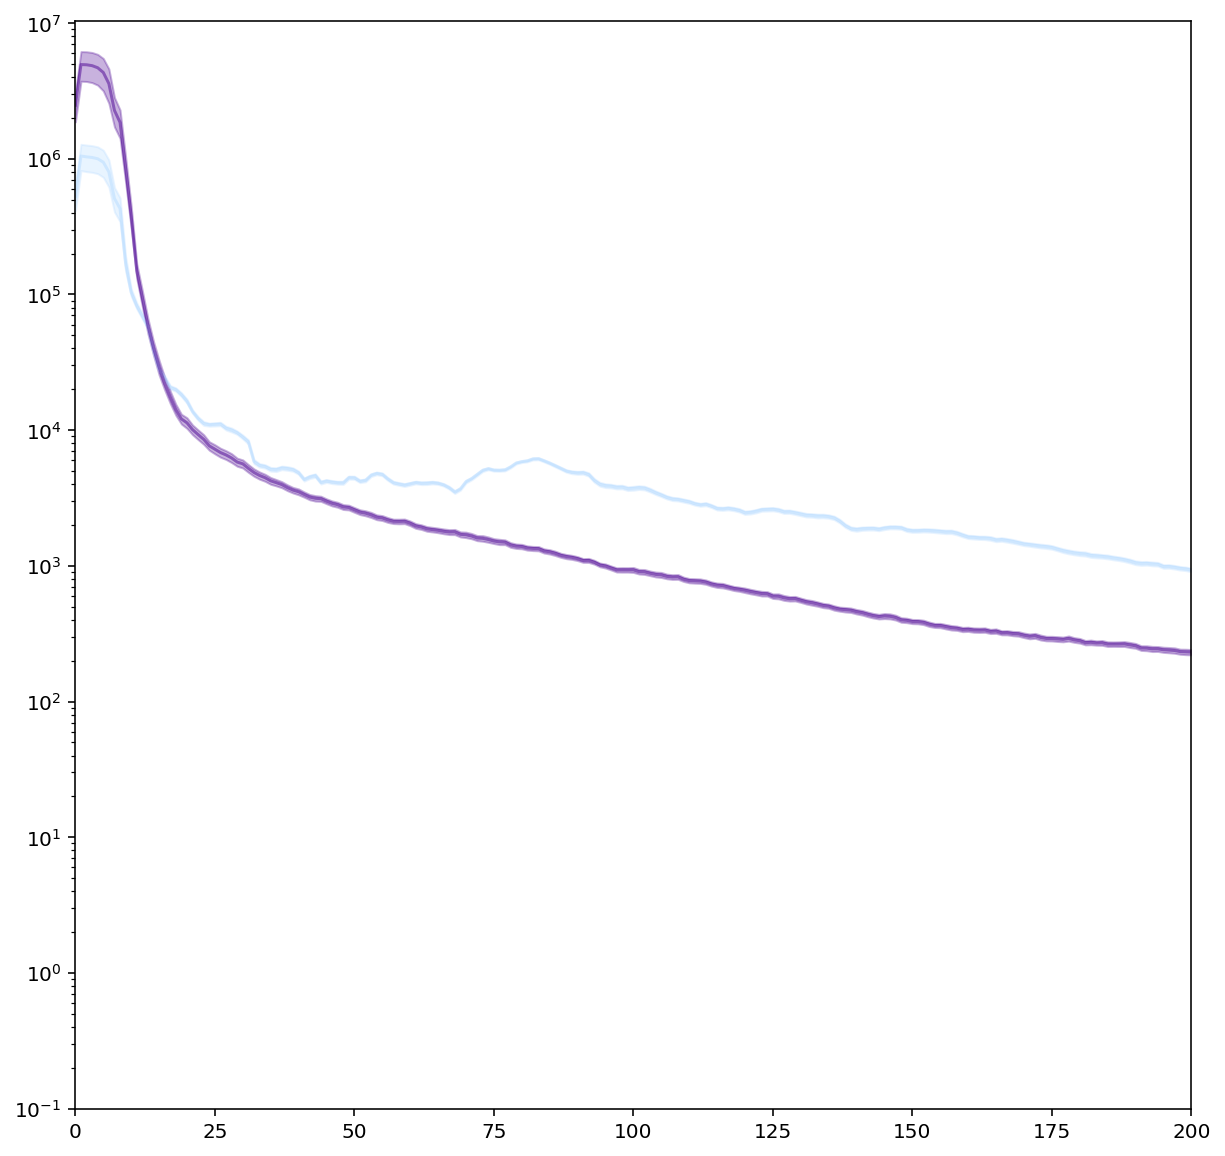

In [20]:
# z007_Pxx_norm, z007_Pxx_concat, z007_freqs
plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,0,:], freqs=z007_freqs, num_trials=int(z007_Pxx_concat.shape[0]/2), ax=None)
# plt.set_ylim(bottom=0.1)
plt.show()

# Plot the Principle Spectral Components

In [21]:
# def run_pca_analysis_for_one_channel_repeatedly(Pxx_norm, Num_Epochs, ax1, ax2, ax3, ax4, channel):
#     # Run PCA
#     pca = PCA(n_components=.95)
#     pca.fit(Pxx_norm[:, channel, :200])

#     # Plot the Explained Variance with Number of Components
#     ax1.plot(np.cumsum(pca.explained_variance_ratio_))
#     ax1.set_xlabel('# PCs')
#     ax1.set_ylabel('explained variance')
#     ax1.set_title(f"Number of Principle Components Ch: {channel}")

#     # Plot the first 3 Principle Components (PSCS)
#     for i in range(3):
#         ax2.plot(pca.components_[i, :], label=str(i + 1))
#     ax2.legend()
#     ax2.set_title(f"Ch: {channel} PSCs projected into PSD (x=Hz)")

#     # Plot the Data based off the first two Principle Compoenents
#     #     fig, ax = plt.subplots(1, 1)
#     x_pca = pca.transform(Pxx_norm[:, channel, :200])
#     ax3.scatter(x_pca[:Num_Epochs, 0], x_pca[:Num_Epochs, 1], alpha=0.2, color='green', label='Active')
#     ax3.scatter(x_pca[Num_Epochs:, 0], x_pca[Num_Epochs:, 1], alpha=0.2, color='red', label='Inactive')
#     ax3.axis('equal')
#     ax3.set(xlabel='component 1', ylabel='component 2',
#             title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
#     ax3.legend()

#     ax4.scatter(x_pca[:Num_Epochs, 1], x_pca[:Num_Epochs, 2], alpha=0.2, color='green', label='Active')
#     ax4.scatter(x_pca[Num_Epochs:, 1], x_pca[Num_Epochs:, 2], alpha=0.2, color='red', label='Inactive')
#     ax4.axis('equal')
#     ax4.set(xlabel='component 2', ylabel='component 3',
#             title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
#     ax4.legend()


In [22]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def run_local_pca_analysis(Pxx_norm, channel):
    # Run PCA
    pca = PCA(n_components=.95)
    pca.fit(Pxx_norm[:, channel, :200])
    return pca
    
    
def plot_the_pscs(pca, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
        
    colors= ['blue', 'gold', 'brown'] 
    
    # Plot the first 3 Principle Components (PSCS)
    
    for i, value in enumerate(['1st', '2nd', '3rd']):
        ax.plot(pca.components_[i, :], label=value, color = colors[i])
        
    if ax is None:
        ax.legend()
#     ax.set_title(f"Ch: {channel} PSCs projected into PSD (x=Hz)")
#     ax.set_title(f" PSCs projected into PSD (x=Hz)")

    
    
def plot_the_pca_scatter(Pxx_norm, pca,  channel, Num_Epochs, ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the Data based off the first two Principle Compoenents
    #     fig, ax = plt.subplots(1, 1)
    x_pca = pca.transform(Pxx_norm[:, channel, :200])
    ax.scatter(x_pca[:Num_Epochs, 0], x_pca[:Num_Epochs, 1], alpha=0.4, s=1, color='#B6DBFF', label='Active')
    ax.scatter(x_pca[Num_Epochs:, 0], x_pca[Num_Epochs:, 1], alpha=0.4, s=1, color='#490092', label='Inactive')
#     ax.axis('equal')
#     ax.set(xlabel='component 1', ylabel='component 2',
#             title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
    if ax is None:
        ax.legend()

#     ax4.scatter(x_pca[:Num_Epochs, 1], x_pca[:Num_Epochs, 2], alpha=0.2, color='green', label='Active')
#     ax4.scatter(x_pca[Num_Epochs:, 1], x_pca[Num_Epochs:, 2], alpha=0.2, color='red', label='Inactive')
#     ax4.axis('equal')
#     ax4.set(xlabel='component 2', ylabel='component 3',
#             title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
#     ax4.legend()


def plot_the_pca_scatter_3d(Pxx_norm, pca,  channel, Num_Epochs, background=True, ax=None):
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    # Plot the Data based off the first two Principle Compoenents
    #     fig, ax = plt.subplots(1, 1)
    x_pca = pca.transform(Pxx_norm[:, channel, :200])
    ax.scatter(x_pca[:Num_Epochs, 0], x_pca[:Num_Epochs, 1], x_pca[:Num_Epochs, 2], s=1,
               alpha=0.4, color='#B6DBFF', label='Active')
    ax.scatter(x_pca[Num_Epochs:, 0], x_pca[Num_Epochs:, 1], x_pca[Num_Epochs:, 2], s=1,
               alpha=0.4, color='#490092', label='Inactive')
#     ax.axis('equal')
            #title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
    if ax is None:
        ax.legend()
        ax.set(xlabel='component 1', ylabel='component 2', zlabel='component 3')
    
    if not background:
#         ax.grid(False)
        ax.xaxis.pane.set_edgecolor('black')
        ax.yaxis.pane.set_edgecolor('black')
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        
        ax.xaxis._axinfo['tick']['inward_factor'] = 0
        ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
        ax.yaxis._axinfo['tick']['inward_factor'] = 0
        ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
        ax.zaxis._axinfo['tick']['inward_factor'] = 0
        ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
        ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
        


#     ax4.scatter(x_pca[:Num_Epochs, 1], x_pca[:Num_Epochs, 2], alpha=0.2, color='green', label='Active')
#     ax4.scatter(x_pca[Num_Epochs:, 1], x_pca[Num_Epochs:, 2], alpha=0.2, color='red', label='Inactive')
#     ax4.axis('equal')
#     ax4.set(xlabel='component 2', ylabel='component 3',
#             title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
#     ax4.legend()


In [23]:
z007_pca = run_local_pca_analysis(Pxx_norm= z007_Pxx_norm, channel= 0)



In [24]:
z007_pca

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

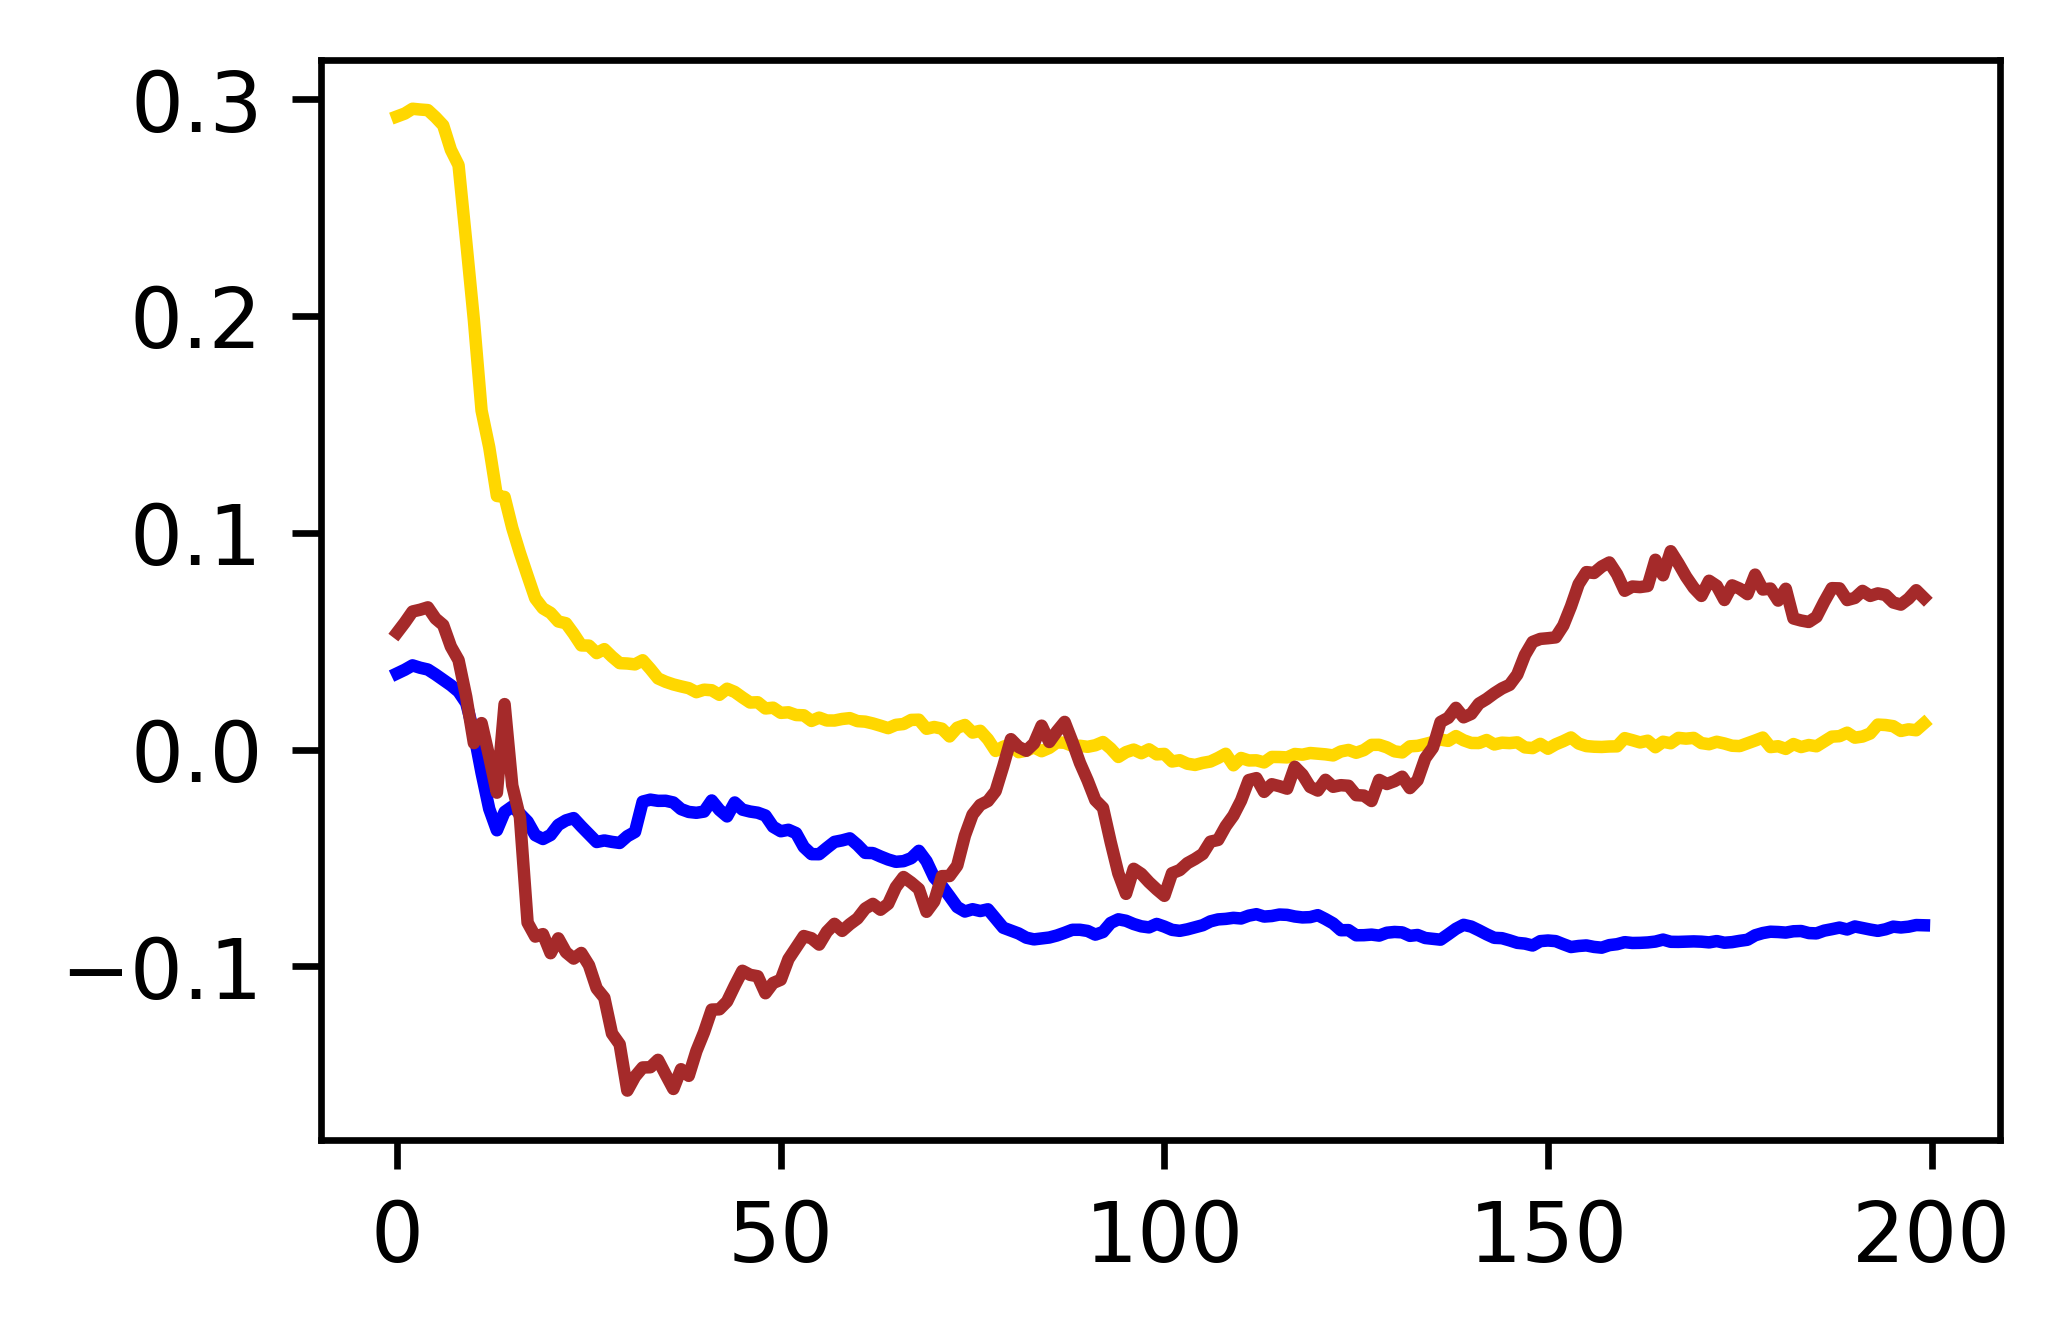

In [25]:
fig = plt.figure(figsize=(3,2), dpi = 300)


# Make the Subplots
# Color Labels
ax1 = fig.add_axes([0.01, 0.01, 0.933, 0.9])

plot_the_pscs(pca=z007_pca, ax=ax1)

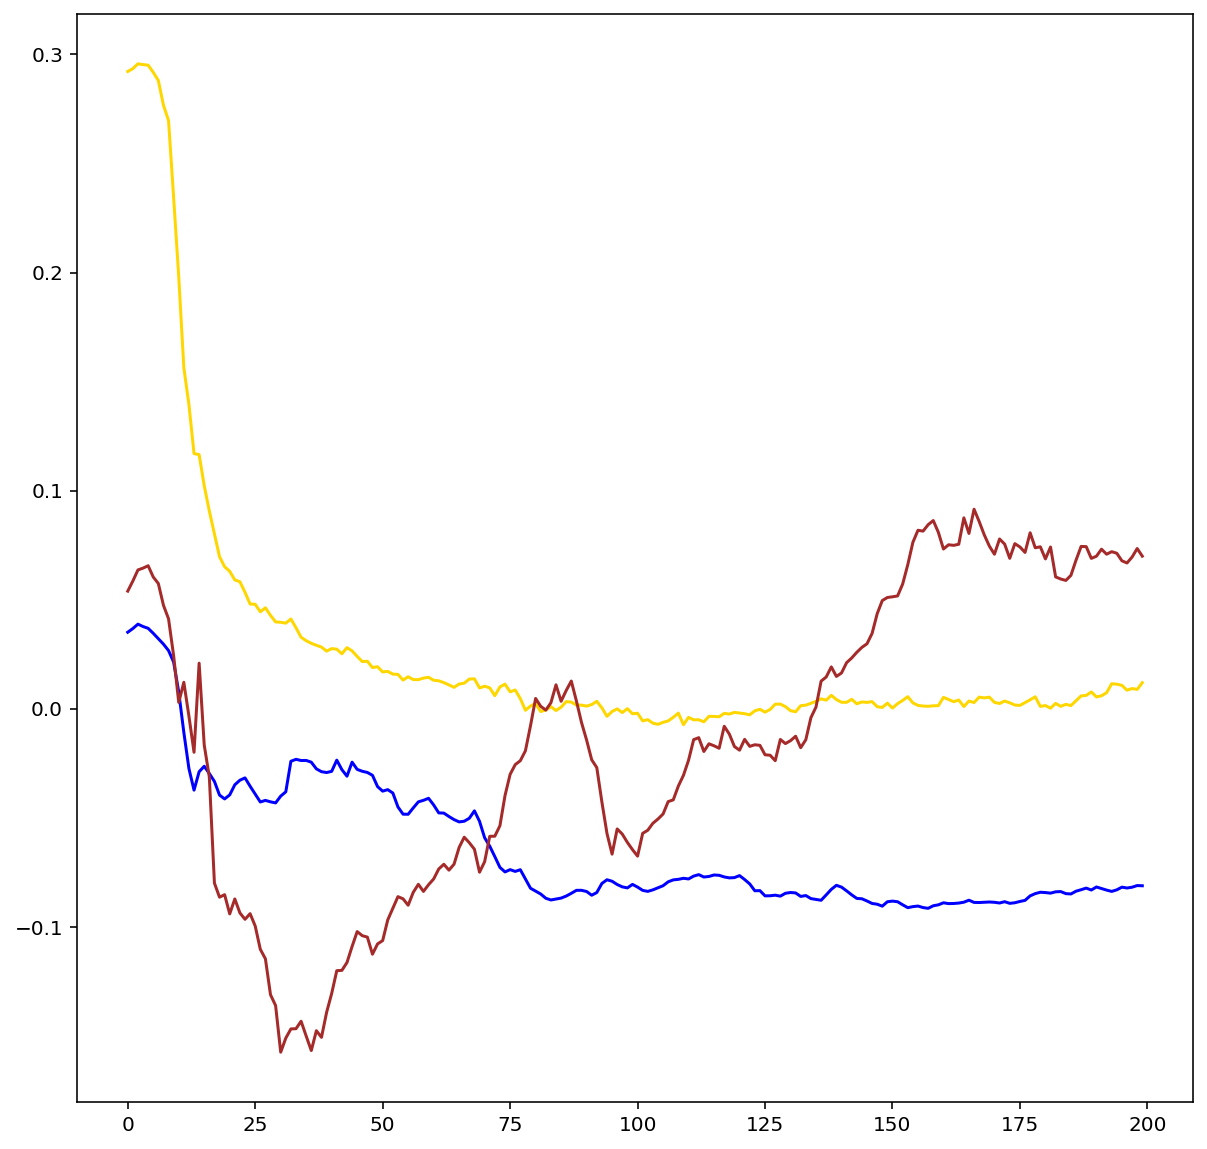

In [26]:
plot_the_pscs(pca=z007_pca)


# Plot the Scatter Plot of the Vocally Active and Vocally Inactive Trials

In [27]:
# Select the Channels being used for this paper figure

z007_chan = 0
z020_chan = 6
z017_chan = 8

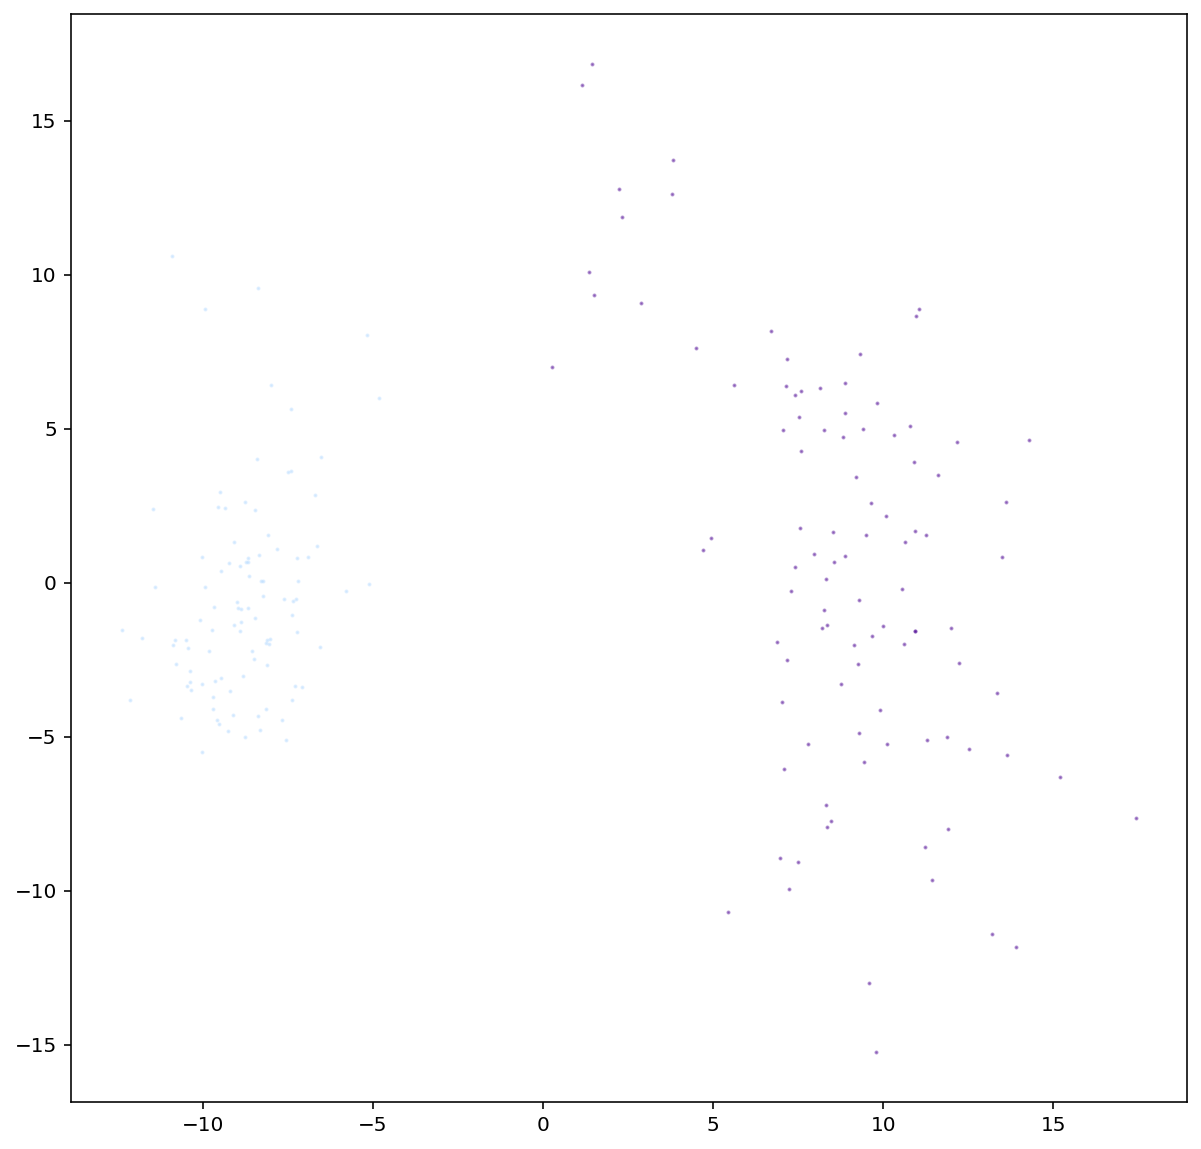

In [28]:
plot_the_pca_scatter(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  channel=0, Num_Epochs=int(z007_Pxx_norm.shape[0]/2), ax=None)


In [29]:
z020_pca = run_local_pca_analysis(Pxx_norm= z020_Pxx_norm, channel= z020_chan)


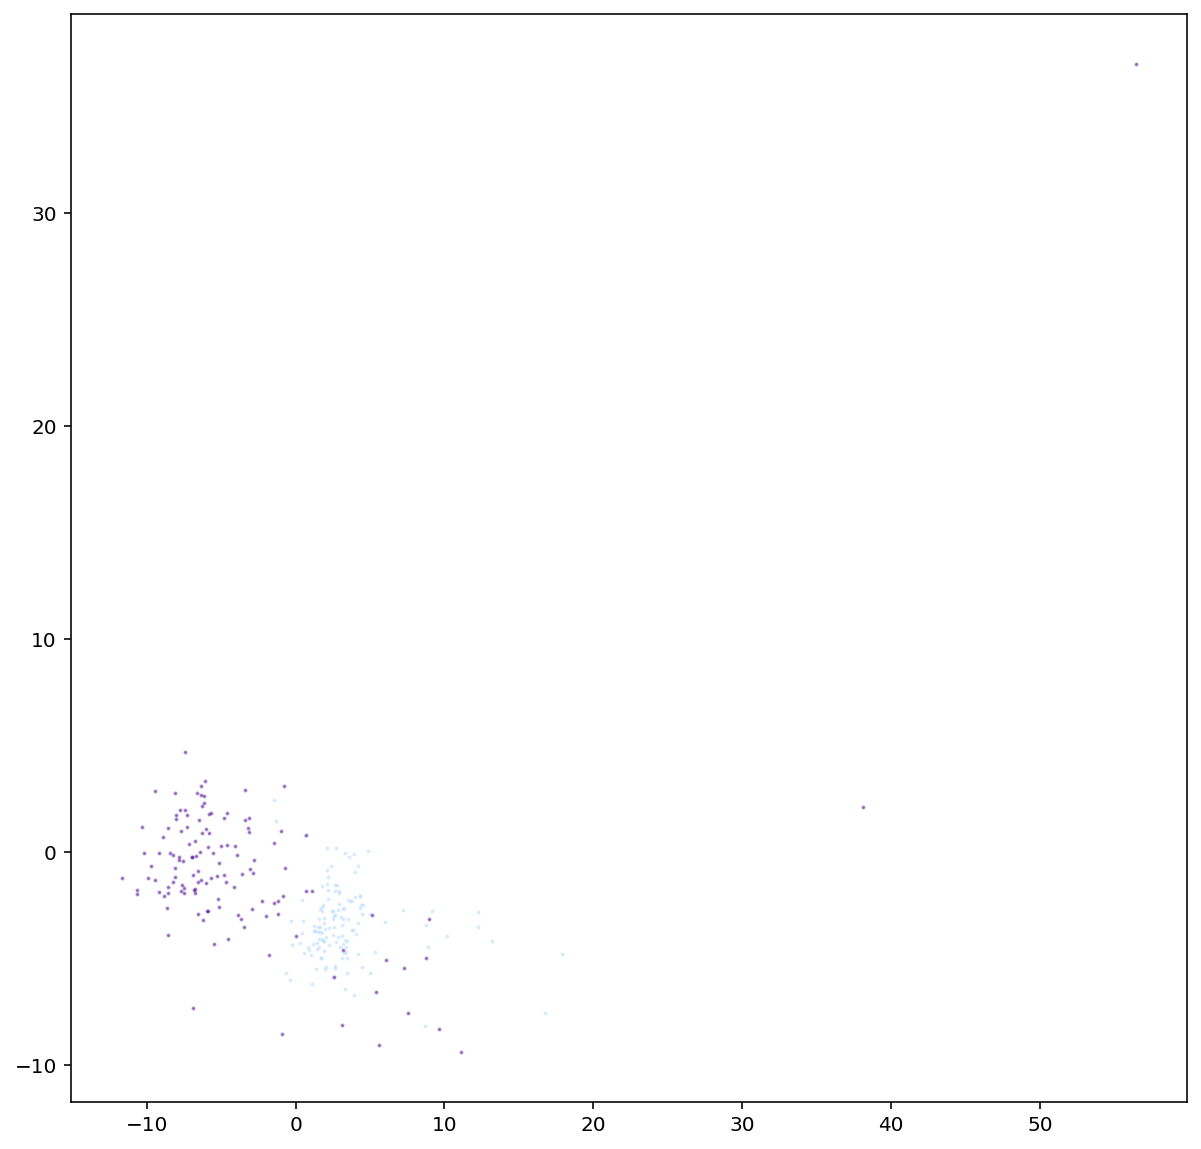

In [30]:
plot_the_pca_scatter(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  channel=0, Num_Epochs=int(z020_Pxx_norm.shape[0]/2), ax=None)


In [31]:
z017_pca = run_local_pca_analysis(Pxx_norm= z017_Pxx_norm, channel= z017_chan)


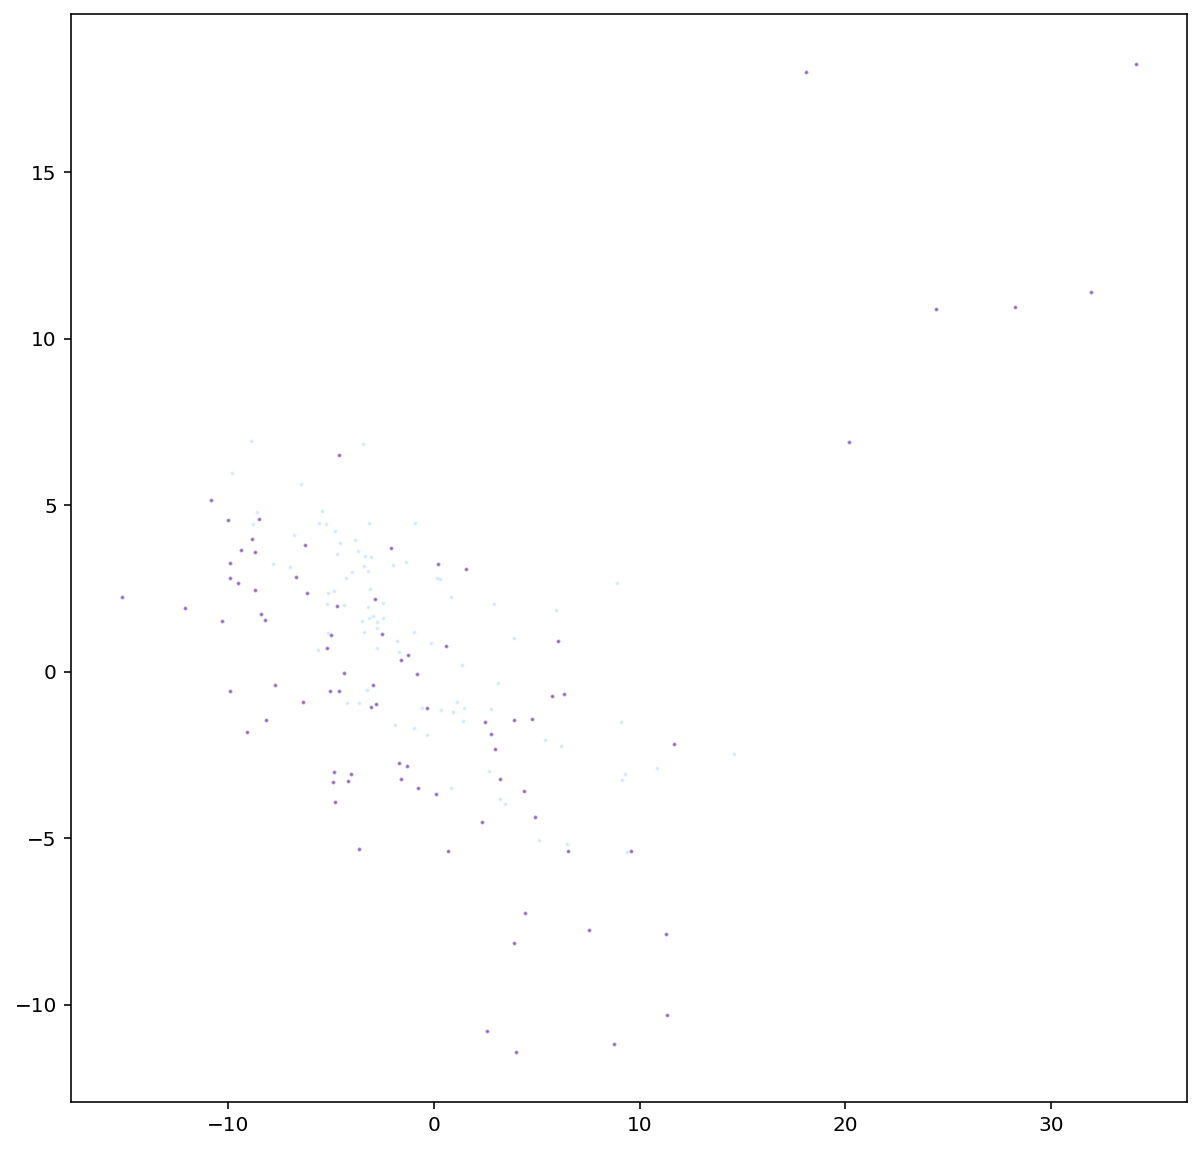

In [32]:
plot_the_pca_scatter(Pxx_norm=z017_Pxx_norm, pca=z017_pca,  channel=0, Num_Epochs=int(z017_Pxx_norm.shape[0]/2), ax=None)


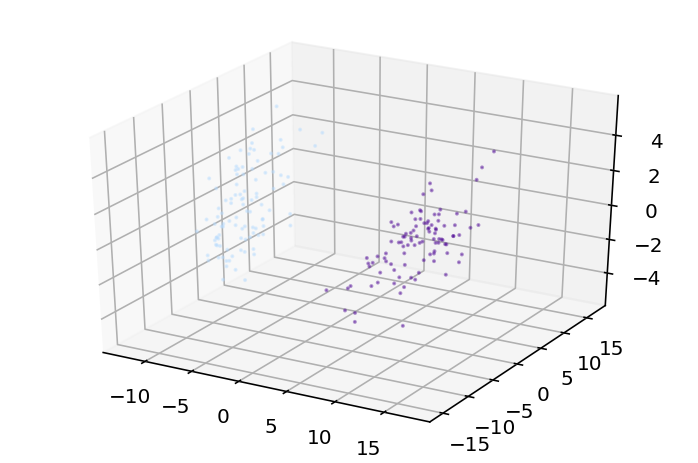

In [33]:

plot_the_pca_scatter_3d(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  channel=0, Num_Epochs=int(z007_Pxx_norm.shape[0]/2), ax=None)





In [34]:
# z007_Pxx_norm, z007_Pxx_concat, z007_freqs

In [35]:
int(z007_Pxx_norm.shape[0]/2)

100

# Remove the outliers

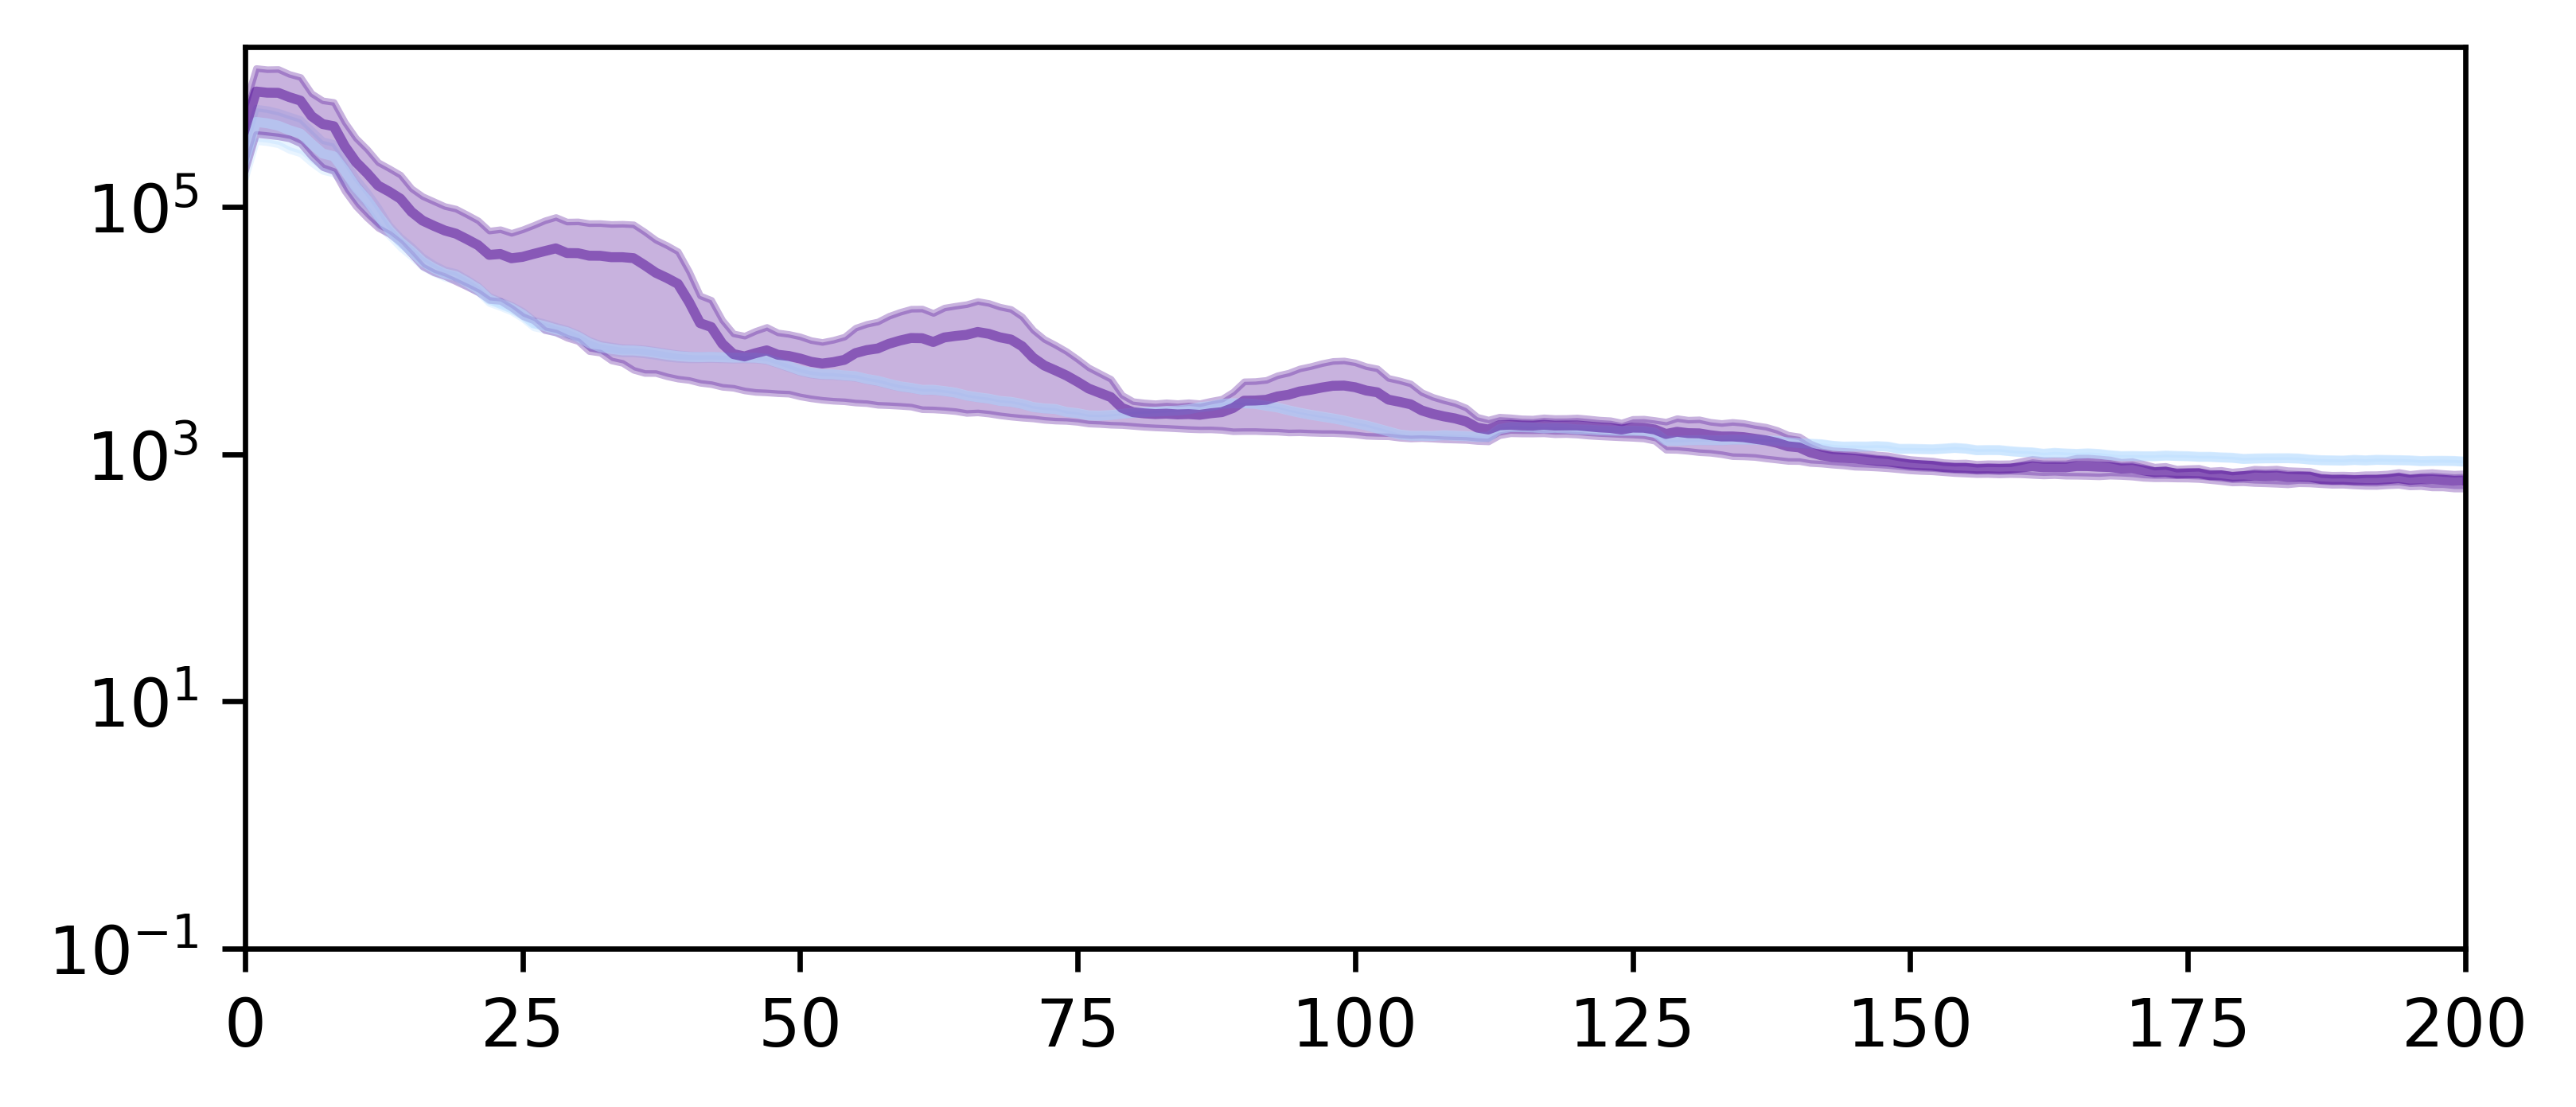

In [36]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(6, 2.5), dpi = 300)

plot_summary_psd_paper(Pxx_concat=z020_Pxx_concat[:,z020_chan,:], 
                       freqs=z020_freqs, 
                       num_trials=int(z020_Pxx_concat.shape[0]/2), ax=ax)
plt.show()

In [37]:
int(z020_Pxx_concat.shape[0]/2)

133

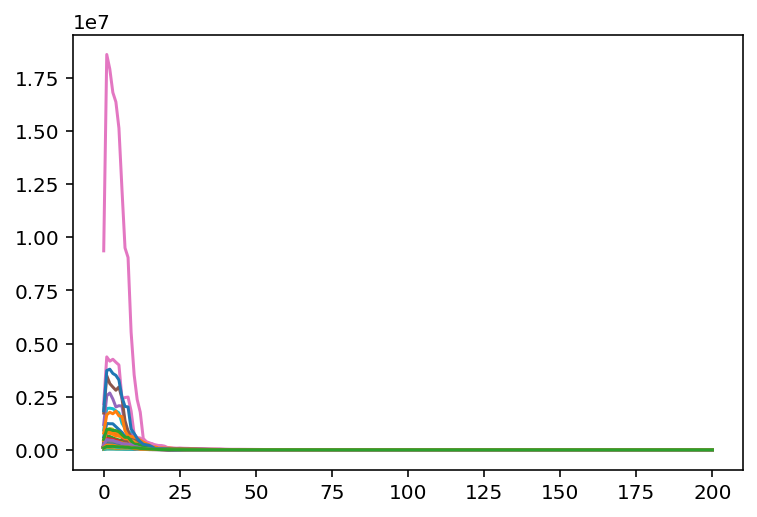

In [38]:
plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[:133,z020_chan,:]))
plt.show()


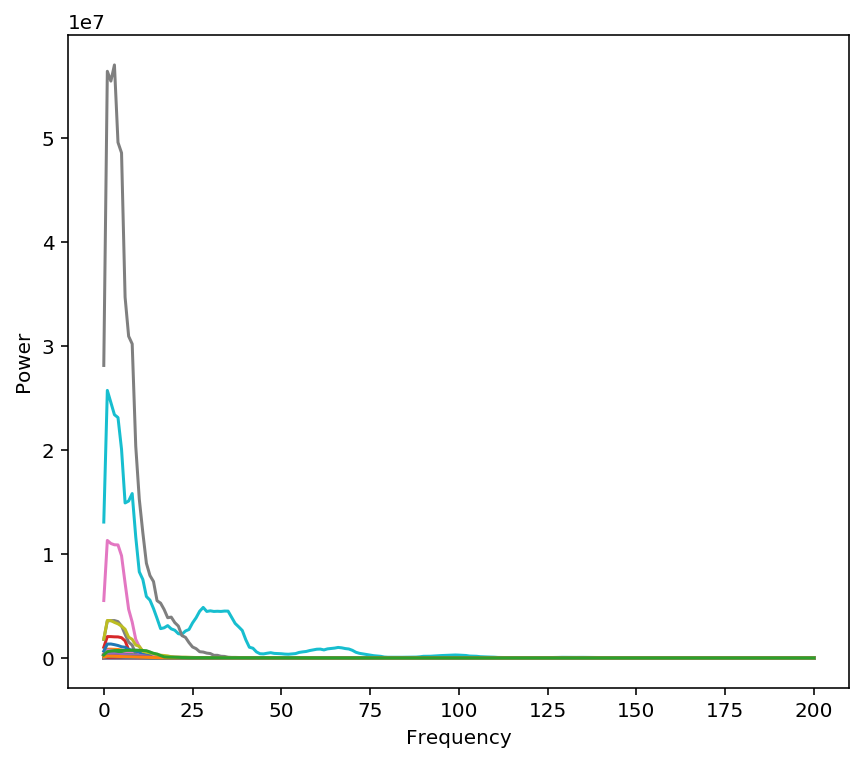

In [39]:
fig, ax = plt.subplots(figsize=(7, 6))

fig.patch.set_facecolor('white')

plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[133:,z020_chan,:]))
plt.ylabel("Power")
plt.xlabel("Frequency")
plt.show()

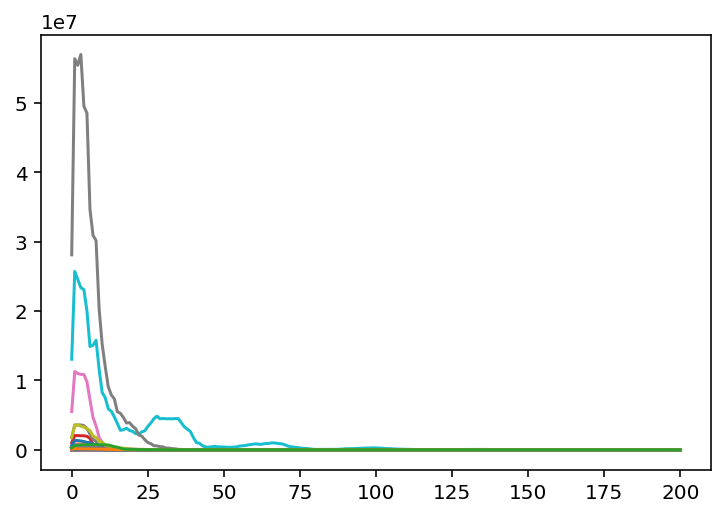

In [40]:
plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[133:,z020_chan,:]))
plt.show()

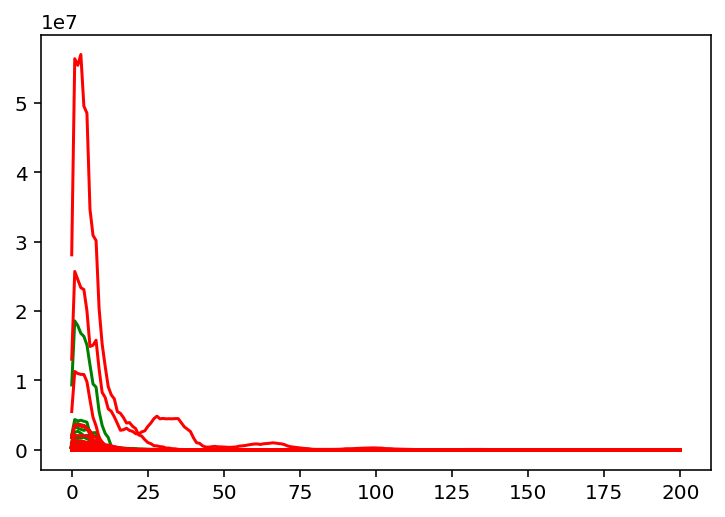

In [41]:
plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[:133,z020_chan,:]), color='green')
plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[133:,z020_chan,:]), color='red')
plt.show()

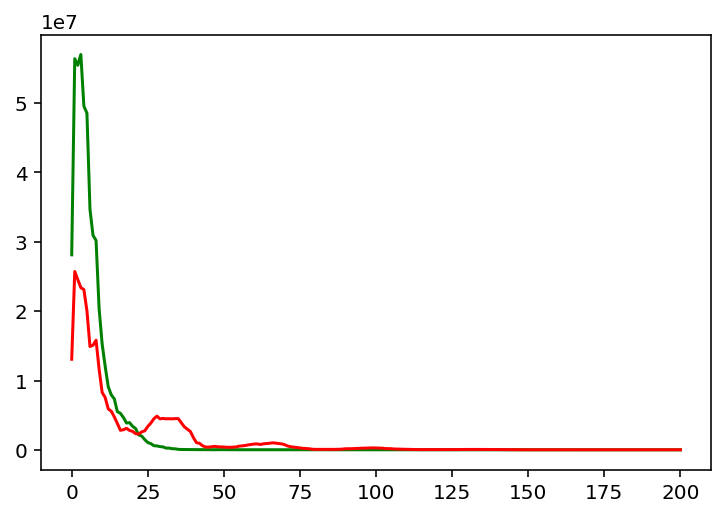

In [42]:
plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[260,z020_chan,:]), color='green')
plt.plot(z020_freqs, np.transpose(z020_Pxx_concat[202,z020_chan,:]), color='red')
plt.show()

In [43]:
np.where(z020_Pxx_concat[:,z020_chan,:]>2e7)

(array([202, 202, 202, 202, 202, 260, 260, 260, 260, 260, 260, 260, 260,
        260, 260]), array([1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [44]:
# Remove Outliers and balance the groups
z020_Pxx_concat = np.delete(z020_Pxx_concat, [0,1,260,202], axis= 0)
# z020_Pxx_concat = np.delete(z020_Pxx_concat, [0,260], axis= 0)




## Remove Outliers from z007

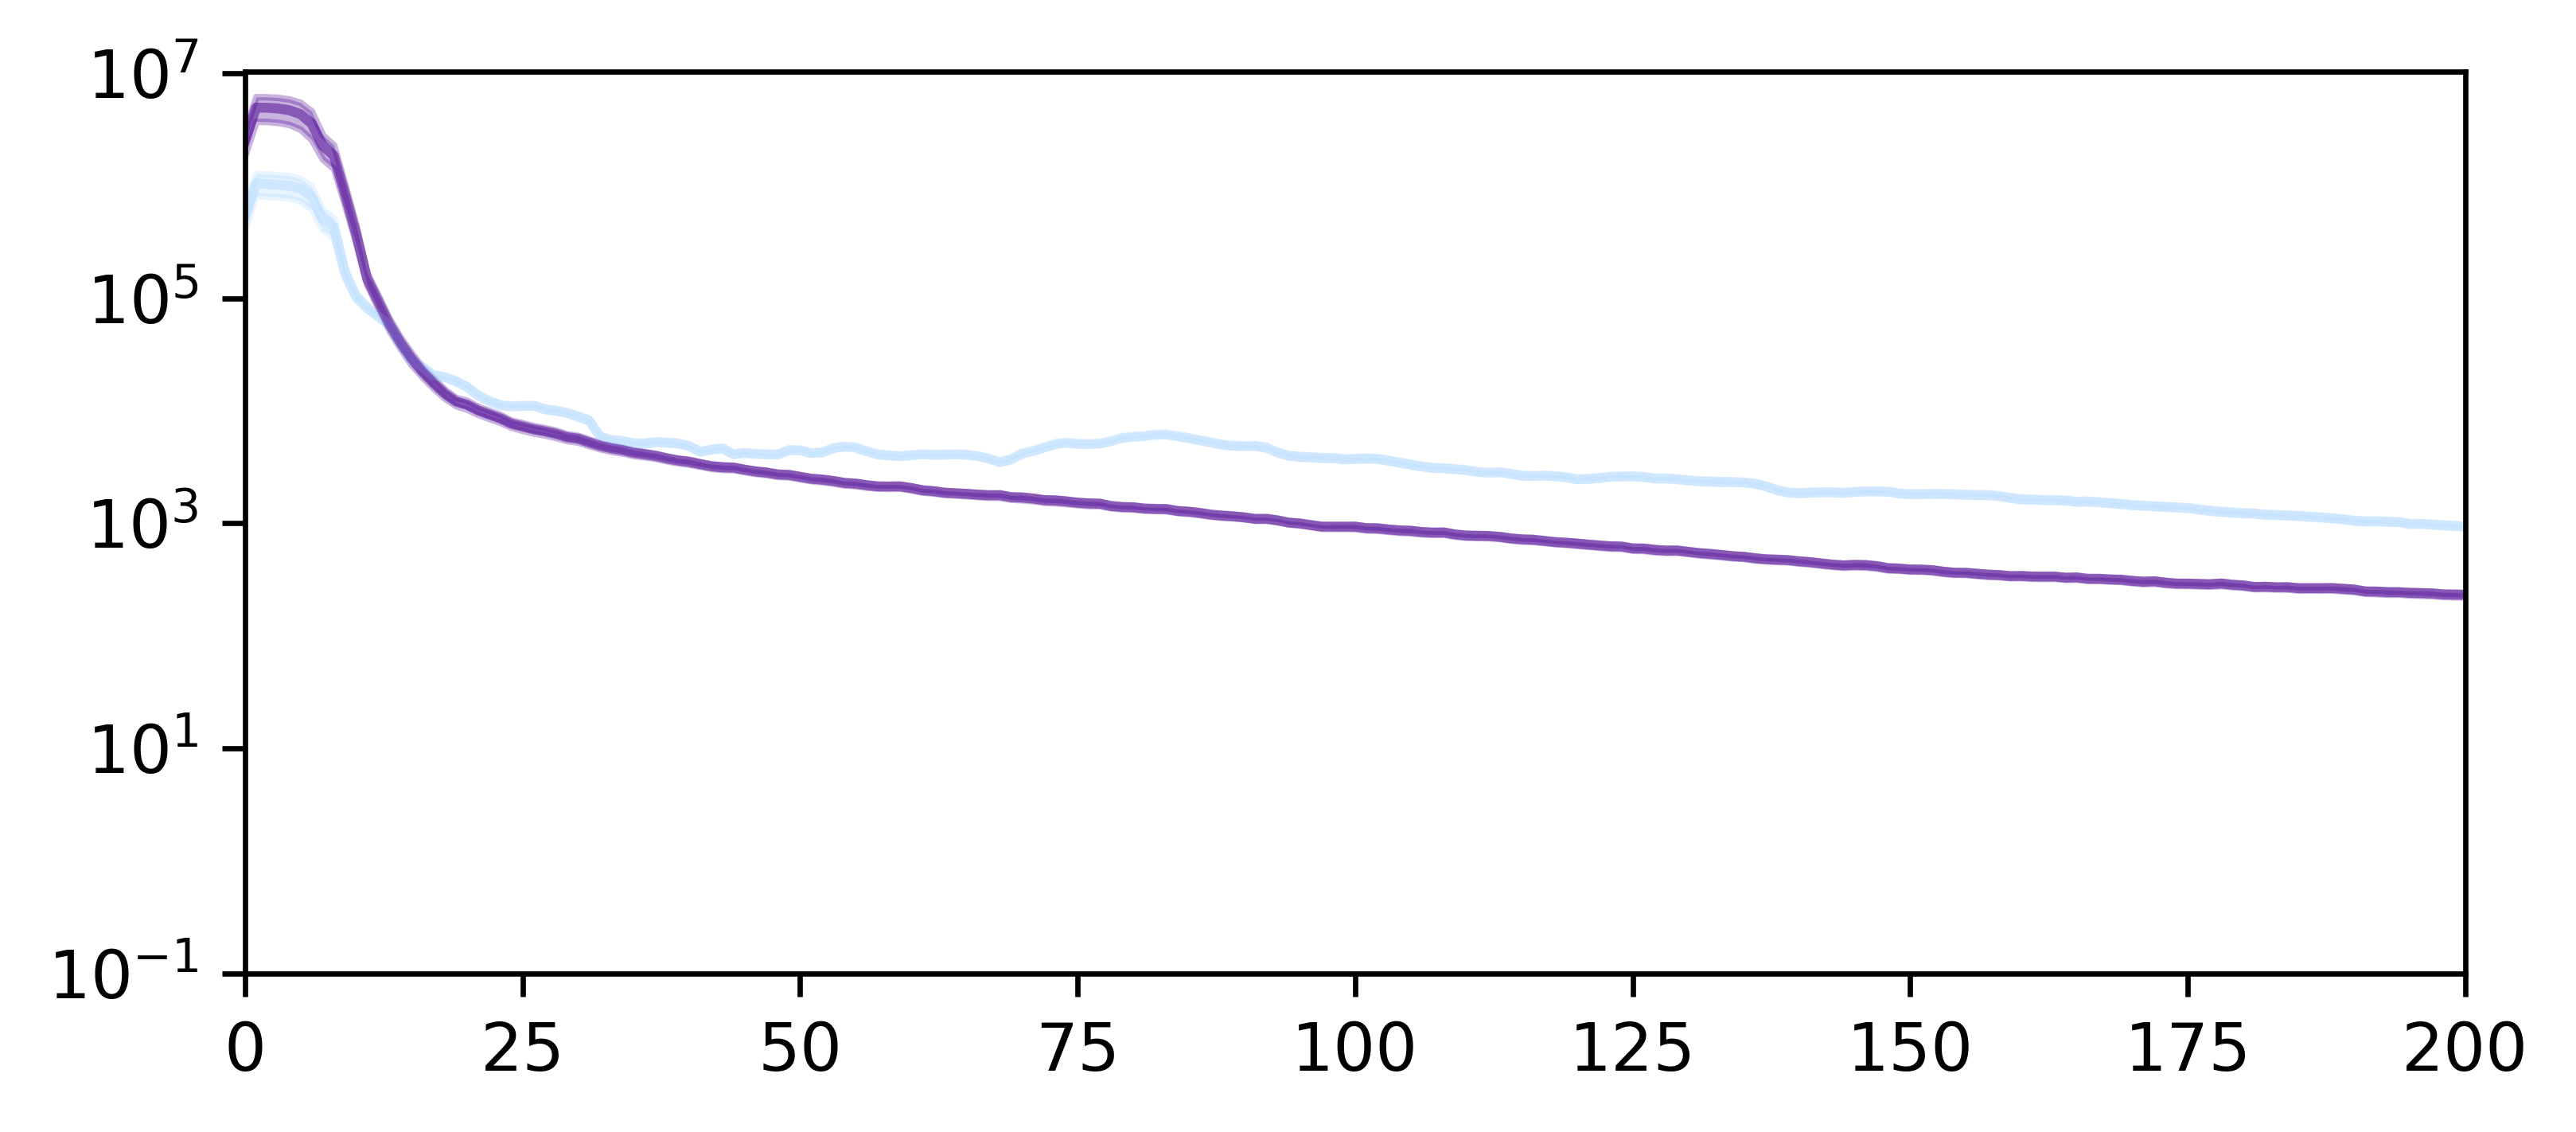

In [45]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(6, 2.5), dpi = 300)

plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,z007_chan,:], 
                       freqs=z007_freqs, 
                       num_trials=int(z007_Pxx_concat.shape[0]/2), ax=ax)
plt.show()

In [46]:
int(z007_Pxx_concat.shape[0]/2)

100

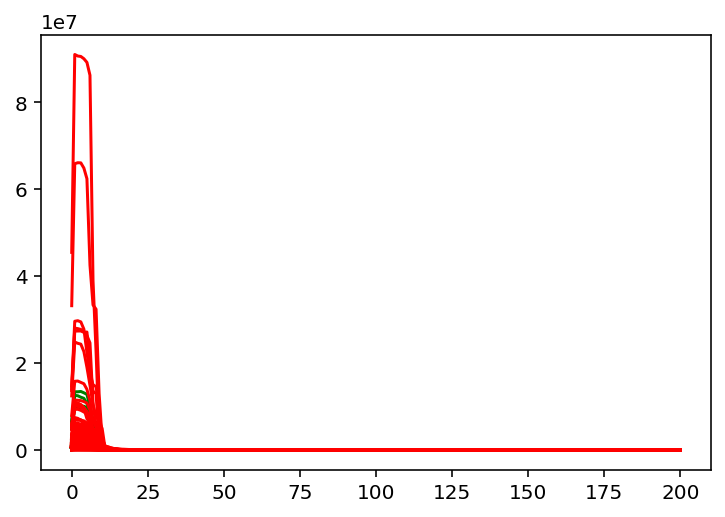

In [47]:
plt.plot(z007_freqs, np.transpose(z007_Pxx_concat[:100,z007_chan,:]), color='green')
plt.plot(z007_freqs, np.transpose(z007_Pxx_concat[100:,z007_chan,:]), color='red')
plt.show()

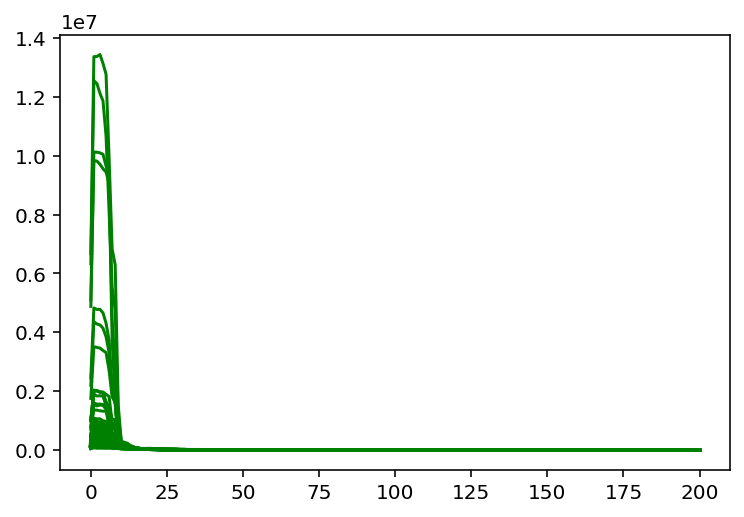

In [48]:
plt.plot(z007_freqs, np.transpose(z007_Pxx_concat[:100,z007_chan,:]), color='green')
plt.show()

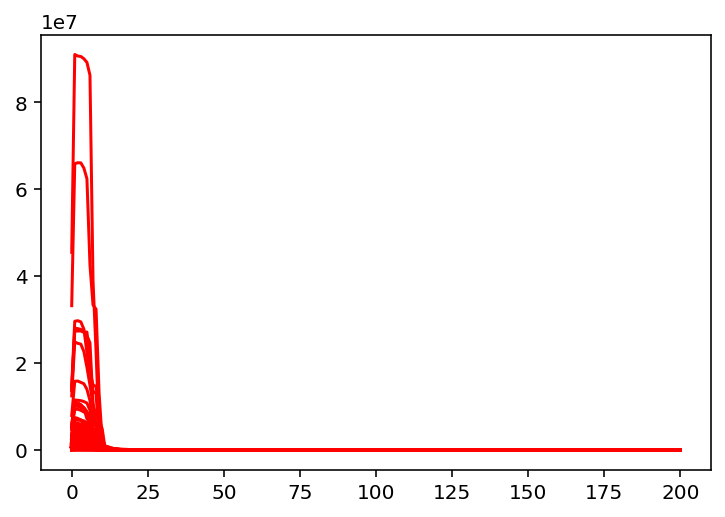

In [49]:
plt.plot(z007_freqs, np.transpose(z007_Pxx_concat[100:,z007_chan,:]), color='red')
plt.show()

In [50]:
np.where(z007_Pxx_concat[:,z007_chan,:]>2e7)

(array([110, 110, 110, 110, 110, 110, 110, 110, 110, 153, 153, 153, 153,
        153, 153, 155, 155, 155, 155, 155, 171, 171, 171, 171, 171, 171,
        171, 171, 171, 179, 179, 179, 179, 179, 195, 195, 195, 195]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 1, 2, 3, 4]))

In [51]:
# Remove Outliers and balance the groups
# day 21
# z017_Pxx_concat = np.delete(z017_Pxx_concat, [5,108], axis= 0)
z007_Pxx_concat = np.delete(z007_Pxx_concat, [0, 1, 2, 3, 4, 5, 6, 112, 115, 118, 123, 128, 142, 191], axis= 0)

## Remove Outliers from z017

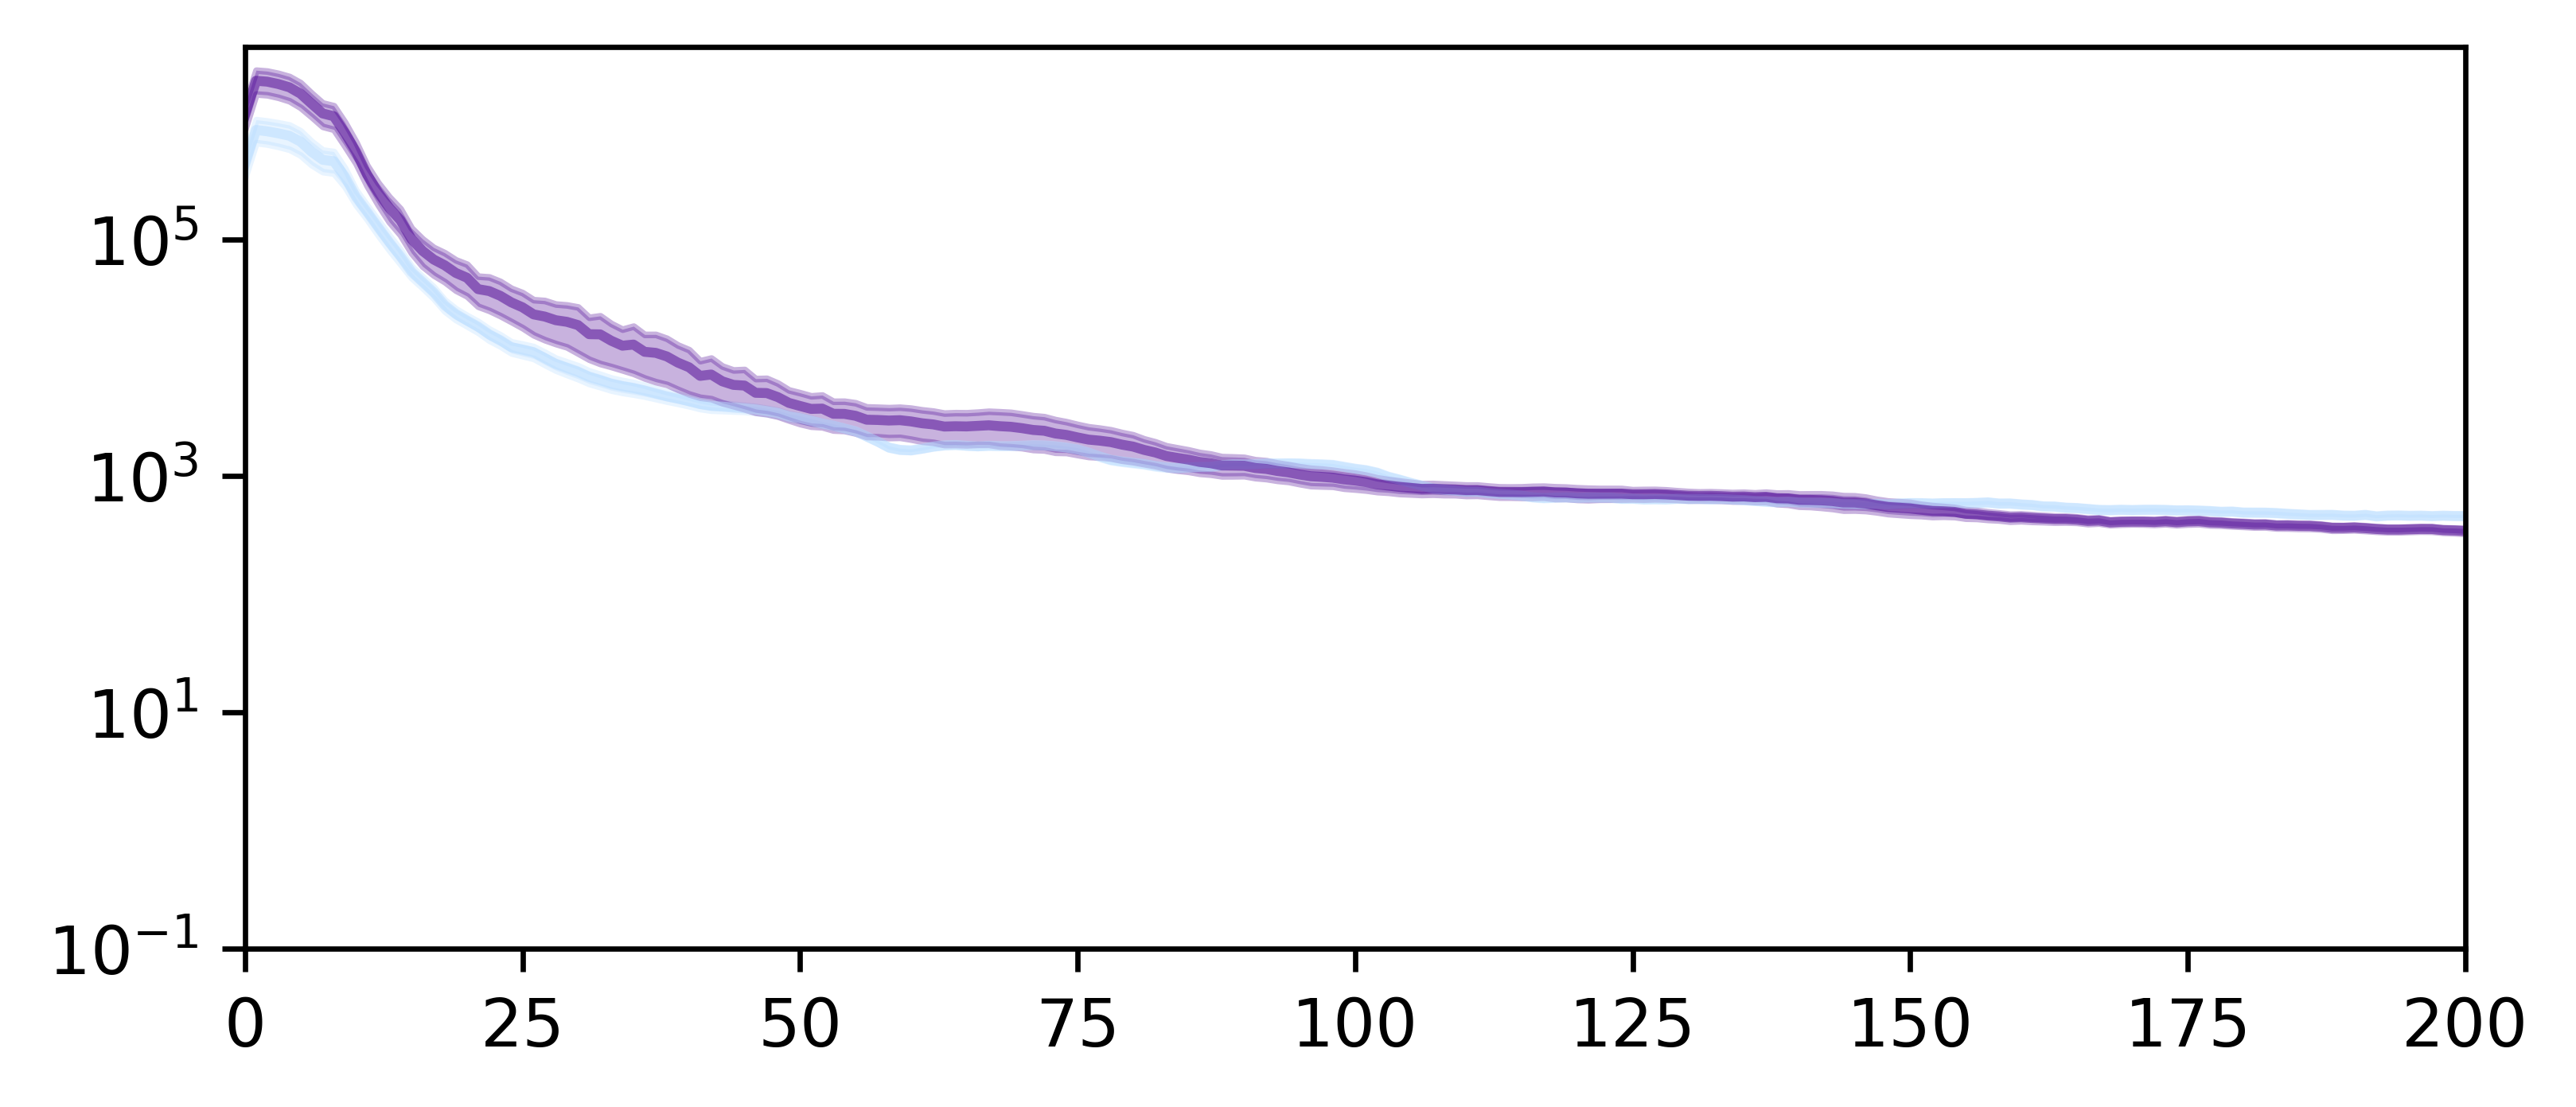

In [52]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(6, 2.5), dpi = 300)

plot_summary_psd_paper(Pxx_concat=z017_Pxx_concat[:,z017_chan,:], 
                       freqs=z017_freqs, 
                       num_trials=int(z017_Pxx_concat.shape[0]/2), ax=ax)
plt.show()

In [53]:
int(z017_Pxx_concat.shape[0]/2)

84

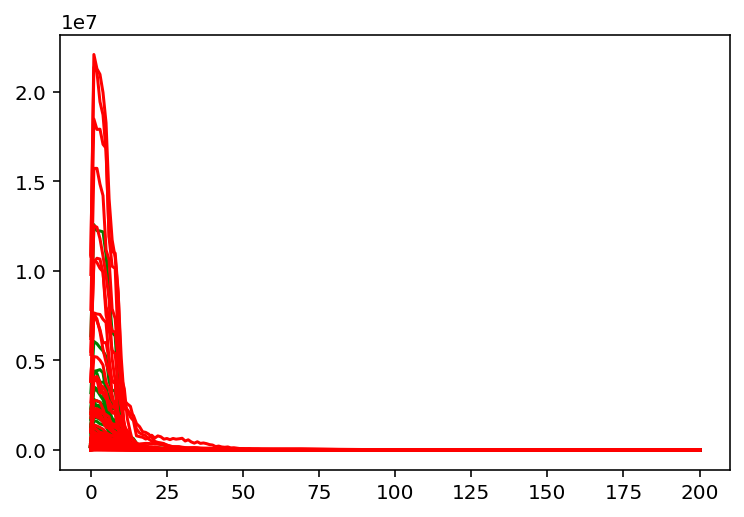

In [54]:
plt.plot(z017_freqs, np.transpose(z017_Pxx_concat[:84,z017_chan,:]), color='green')
plt.plot(z017_freqs, np.transpose(z017_Pxx_concat[84:,z017_chan,:]), color='red')
plt.show()

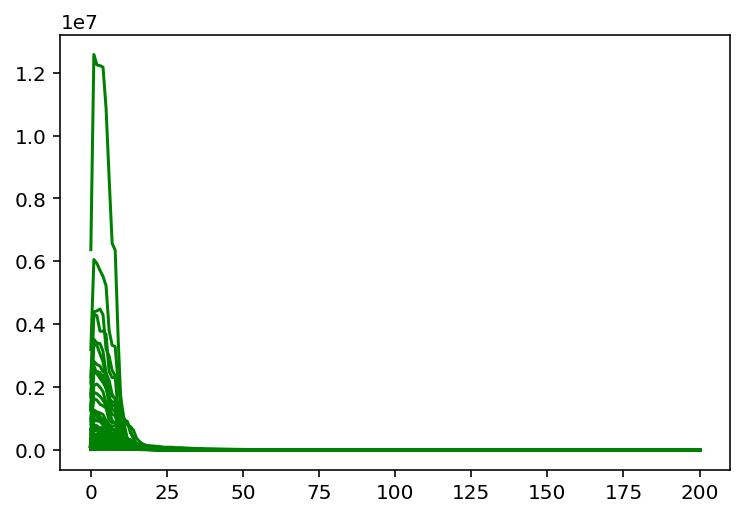

In [55]:
plt.plot(z017_freqs, np.transpose(z017_Pxx_concat[:84,z017_chan,:]), color='green')
plt.show()

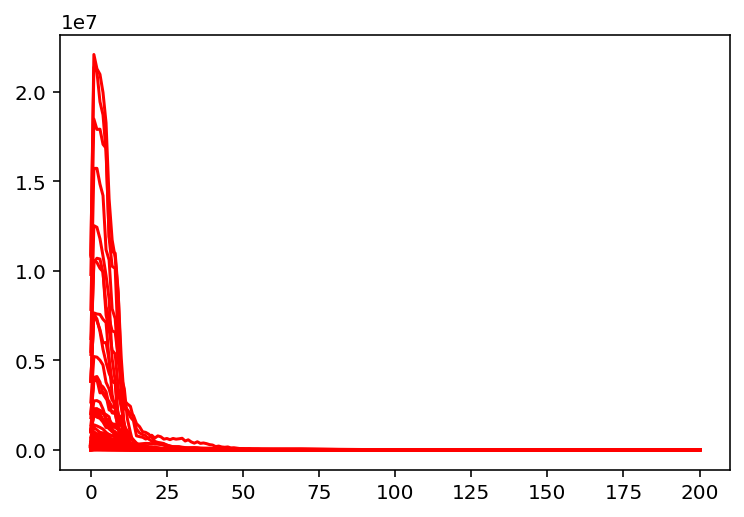

In [56]:
plt.plot(z017_freqs, np.transpose(z017_Pxx_concat[84:,z017_chan,:]), color='red')
plt.show()

In [57]:
# np.shape(np.where(z017_Pxx_concat[:,z017_chan,:]>1.5e7)

In [58]:
# plt.hist(z017_Pxx_concat[:80,z017_chan,160], color='green', alpha=.5)
# plt.hist(z017_Pxx_concat[80:,z017_chan,160], color='red', alpha=.5)
# plt.show()

In [59]:
np.shape(z017_Pxx_concat)

(168, 16, 201)

In [60]:
np.where(z017_Pxx_concat[:,z017_chan,:]>1e7)

(array([  5,   5,   5,   5,   5,  84,  84,  84, 135, 135, 135, 135, 139,
        139, 139, 139, 139, 139, 139, 139, 139, 140, 140, 140, 140, 140,
        140, 141, 141, 141, 141, 141, 141, 141, 141, 141, 149, 149, 149,
        149, 149, 149, 149, 149, 150, 150, 150]),
 array([1, 2, 3, 4, 5, 1, 2, 3, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 1,
        2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8,
        1, 2, 3]))

In [61]:
np.shape(z017_Pxx_concat[:,z017_chan,:])

(168, 201)

In [62]:
168/2

84.0

In [63]:
# Remove Outliers and balance the groups
# day 21
# z017_Pxx_concat = np.delete(z017_Pxx_concat, [5,108], axis= 0)
z017_Pxx_concat = np.delete(z017_Pxx_concat, [0,1,2,3, 91, 93, 135, 145], axis= 0)

In [64]:
# z017_Pxx_norm2 = np.log(z017_Pxx_concat / np.mean(z017_Pxx_concat, axis=0)[None, :, :]) 
#### Delete ####

# Make the 3x3 Plot

In [65]:
def plot_the_pscs_fp(pca, flip=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
        
    colors= ['blue', 'gold', 'brown'] 
    
    # Plot the first 3 Principle Components (PSCS)
    
    for i, value in enumerate(['1st', '2nd', '3rd']):
        if i in flip:
            ax.plot(-pca.components_[i, :], label=value, color = colors[i])
        else:
            ax.plot(pca.components_[i, :], label=value, color = colors[i])
        
    if ax is None:
        ax.legend()
#     ax.set_title(f"Ch: {channel} PSCs projected into PSD (x=Hz)")
#     ax.set_title(f" PSCs projected into PSD (x=Hz)")

In [66]:
def plot_the_pca_scatter_3d_w_flip(Pxx_norm, pca,  channel, Num_Epochs, background=True, flip=None, ax=None):
    
    if flip:
        if 0 in flip:
            psc1_flip = -1
        else:
            psc1_flip = 1
            
        if 1 in flip:
            psc2_flip = -1
        else:
            psc2_flip = 1
            
        if 2 in flip:
            psc3_flip = -1
        else:
            psc3_flip = 1
    else:
        psc1_flip = 1
        psc2_flip = 1
        psc3_flip = 1
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    # Plot the Data based off the first two Principle Compoenents
    #     fig, ax = plt.subplots(1, 1)
    x_pca = pca.transform(Pxx_norm[:, channel, :200])
    ax.scatter(x_pca[:Num_Epochs, 0]*psc1_flip, x_pca[:Num_Epochs, 1]*psc2_flip, x_pca[:Num_Epochs, 2]*psc3_flip, s=1,
               alpha=0.4, color='#B6DBFF', label='Active')
    ax.scatter(x_pca[Num_Epochs:, 0]*psc1_flip, x_pca[Num_Epochs:, 1]*psc2_flip, x_pca[Num_Epochs:, 2]*psc3_flip, s=1,
               alpha=0.4, color='#490092', label='Inactive')
#     ax.axis('equal')
            #title=f"principal components for CH {channel}")  # ,xlim=(-5, 5), ylim=(-3, 3.1))
    if ax is None:
        ax.legend()
        ax.set(xlabel='component 1', ylabel='component 2', zlabel='component 3')
    
    if not background:
#         ax.grid(False)
        ax.xaxis.pane.set_edgecolor('black')
        ax.yaxis.pane.set_edgecolor('black')
        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        
        ax.xaxis._axinfo['tick']['inward_factor'] = 0
        ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
        ax.yaxis._axinfo['tick']['inward_factor'] = 0
        ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
        ax.zaxis._axinfo['tick']['inward_factor'] = 0
        ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
        ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
        
        


In [67]:
# [left, bottom, width, height] 


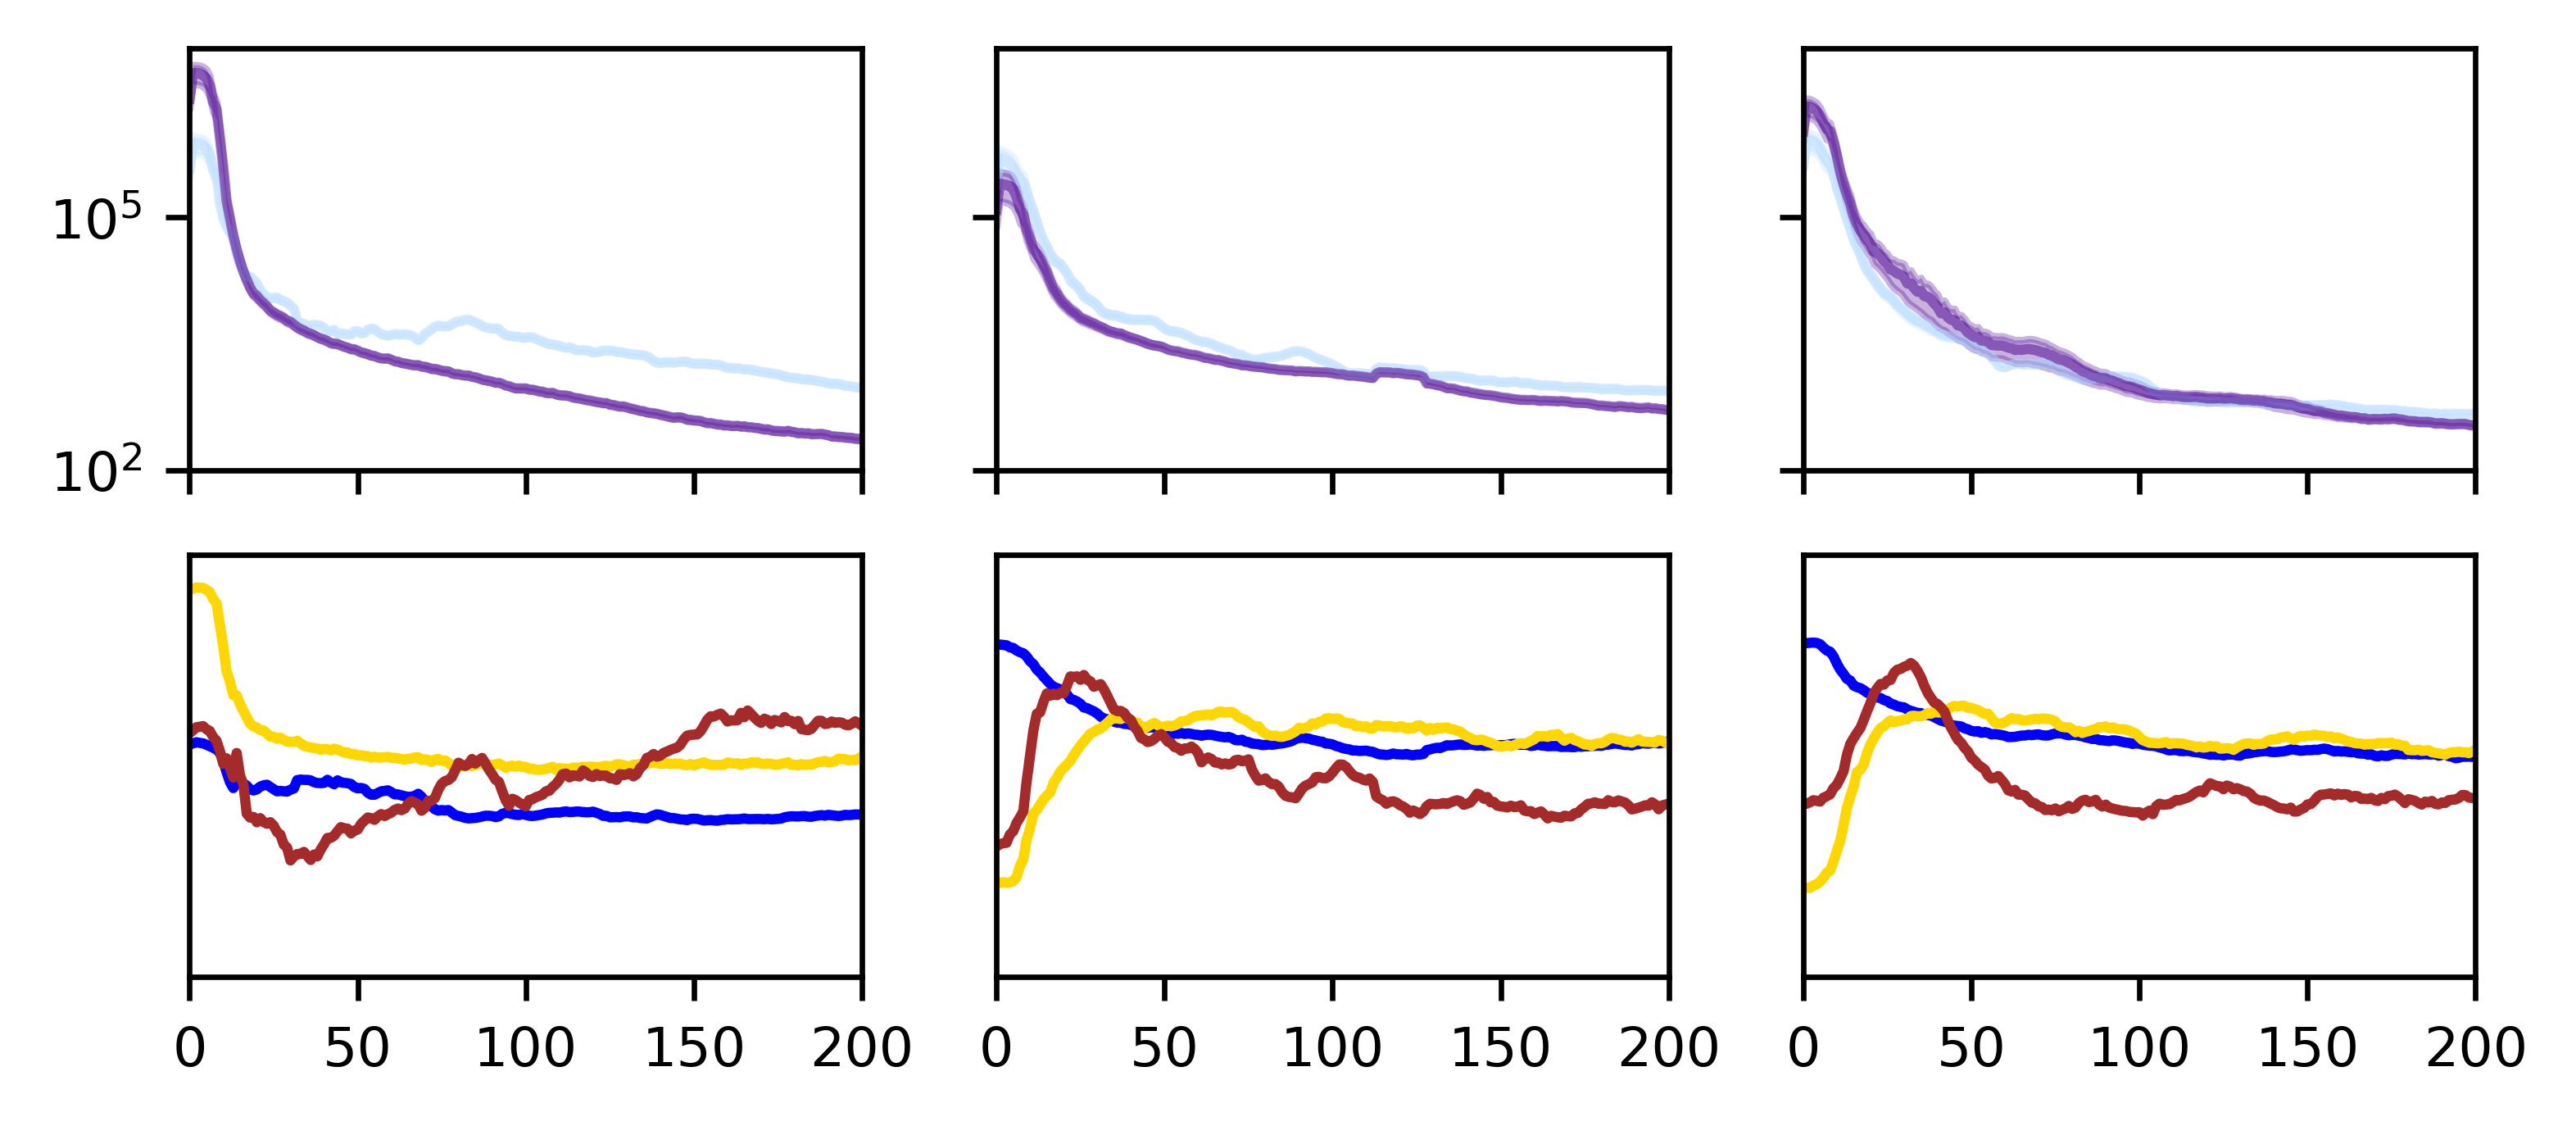

In [68]:
subsize = 8
bigsize = 12
ticksize = 8

fig, ax_2d = plt.subplots(2, 3, sharex=True, sharey=False, figsize=(6, 2.5), dpi = 300)
ax = [ax_inst for ax_inst in ax_2d.flat]

z007_chan = 0
z020_chan = 6
z017_chan = 8

# z007
## PSD
plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,z007_chan,:], 
                       freqs=z007_freqs, 
                       num_trials=int(z007_Pxx_concat.shape[0]/2), ax=ax[0])
ax[0].set_ylim(bottom=100, top = 10e6)
ax[0].tick_params(axis='both', which='major', labelsize=ticksize)
# ax[0].set_ylabel(ylabel='Power mV^2/Hz', fontsize=subsize)



# PSCs

z007_pca = run_local_pca_analysis(Pxx_norm= z007_Pxx_norm, channel= z007_chan)
plot_the_pscs(pca=z007_pca, ax=ax[3])

# ax[3].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax[3].tick_params(axis='both', which='major', labelsize=ticksize)
ax[3].tick_params(axis='y', which='both',length=0)
# ax[3].axhline(y=0, color = 'black', alpha=.5)
ax[3].set_ylim([-.35, .35])
ax[3].set_yticklabels([])






# z020
## PSD
plot_summary_psd_paper(Pxx_concat=z020_Pxx_concat[:,z020_chan,:], 
                       freqs=z020_freqs, 
                       num_trials=int(z020_Pxx_concat.shape[0]/2), ax=ax[1])
# ax[1].set_ylim(bottom=100)
ax[1].set_ylim(bottom=100, top = 10e6)
ax[1].set_yticklabels([])



# PSCs
z020_pca = run_local_pca_analysis(Pxx_norm= z020_Pxx_norm, channel= z020_chan)
plot_the_pscs(pca=z020_pca, ax=ax[4])
# ax[3].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax[4].tick_params(axis='both', which='major', labelsize=ticksize)
ax[4].tick_params(axis='y', which='both',length=0)
# ax[4].axhline(y=0, color = 'black', alpha=.5)
ax[4].set_ylim([-.35, .35])
ax[4].set_yticklabels([])




# z017
## PSD
plot_summary_psd_paper(Pxx_concat=z017_Pxx_concat[:,z017_chan,:], 
                       freqs=z017_freqs, 
                       num_trials=int(z017_Pxx_concat.shape[0]/2), ax=ax[2])
# ax[2].set_ylim(bottom=100)
ax[2].set_ylim(bottom=100, top = 10e6)
ax[2].set_yticklabels([])



# PSCs
z017_pca = run_local_pca_analysis(Pxx_norm= z017_Pxx_norm, channel= z017_chan)
# plot_the_pscs(pca=z017_pca, ax=ax[5])

ax[5].plot(z017_pca.components_[0, :], label='1st', color = 'blue')
ax[5].plot(z017_pca.components_[1, :], label='2nd', color = 'gold')
ax[5].plot(z017_pca.components_[2, :], label='3rd', color = 'brown')

# ax[5].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax[5].tick_params(axis='both', which='major', labelsize=ticksize)
ax[5].tick_params(axis='y', which='both',length=0)
# ax[5].axhline(y=0, color = 'black', alpha=.5)

ax[5].set_ylim([-.35, .35])
ax[5].set_yticklabels([])




plt.show()


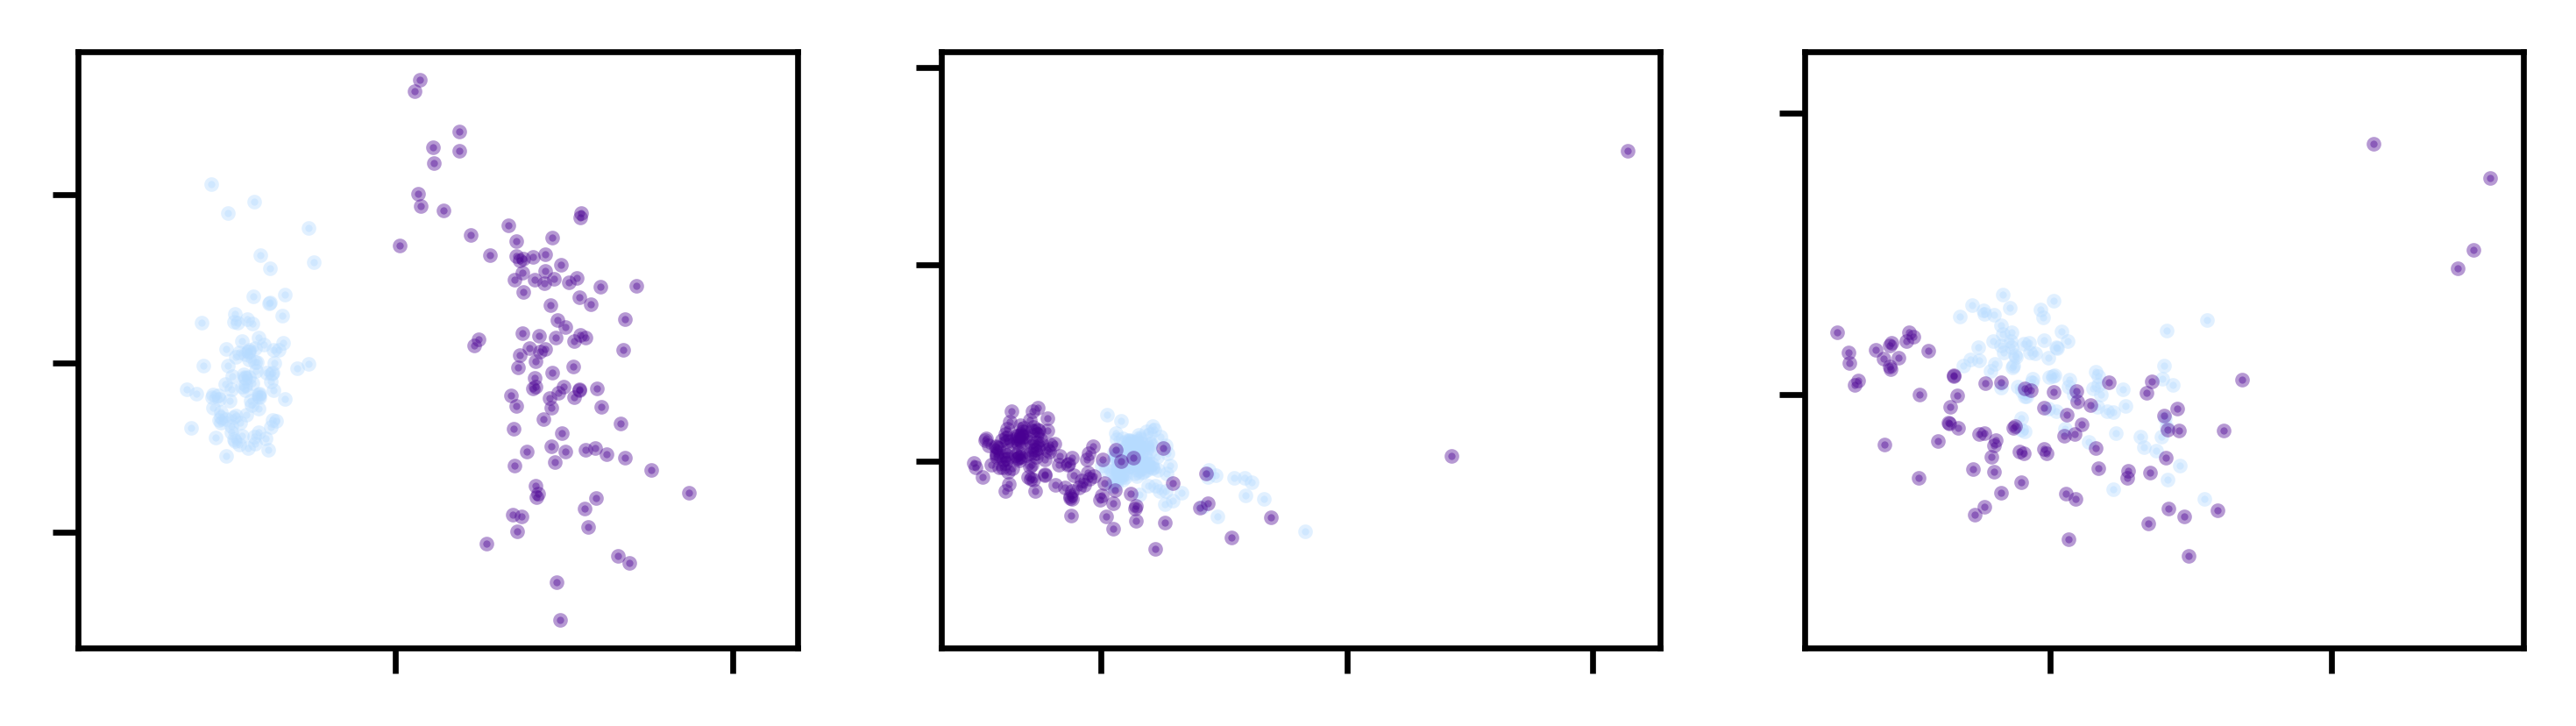

In [69]:
subsize = 8
bigsize = 12
ticksize = 8

fig, ax_2d = plt.subplots(1, 3, figsize=(6, 1.5), dpi = 300)
ax = [ax_inst for ax_inst in ax_2d.flat]


# Plot the 3D Scatter
plot_the_pca_scatter(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  
                        channel=z007_chan, 
                        Num_Epochs=int(z007_Pxx_norm.shape[0]/2), 
                        ax=ax[0])
ax[0].axis('equal')
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])



# Plot the 3D Scatter
plot_the_pca_scatter(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  
                        channel=z020_chan, 
                        Num_Epochs=int(z020_Pxx_norm.shape[0]/2), 
                        ax=ax[1])

ax[1].axis('equal')
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])



# Plot the 3D Scatter
plot_the_pca_scatter(Pxx_norm=z017_Pxx_norm, pca=z017_pca, 
                        channel=z017_chan, 
                        Num_Epochs=int(z017_Pxx_norm.shape[0]/2), 
                        ax=ax[2])
ax[2].axis('equal')
ax[2].set_yticklabels([])
ax[2].set_xticklabels([])




plt.show()

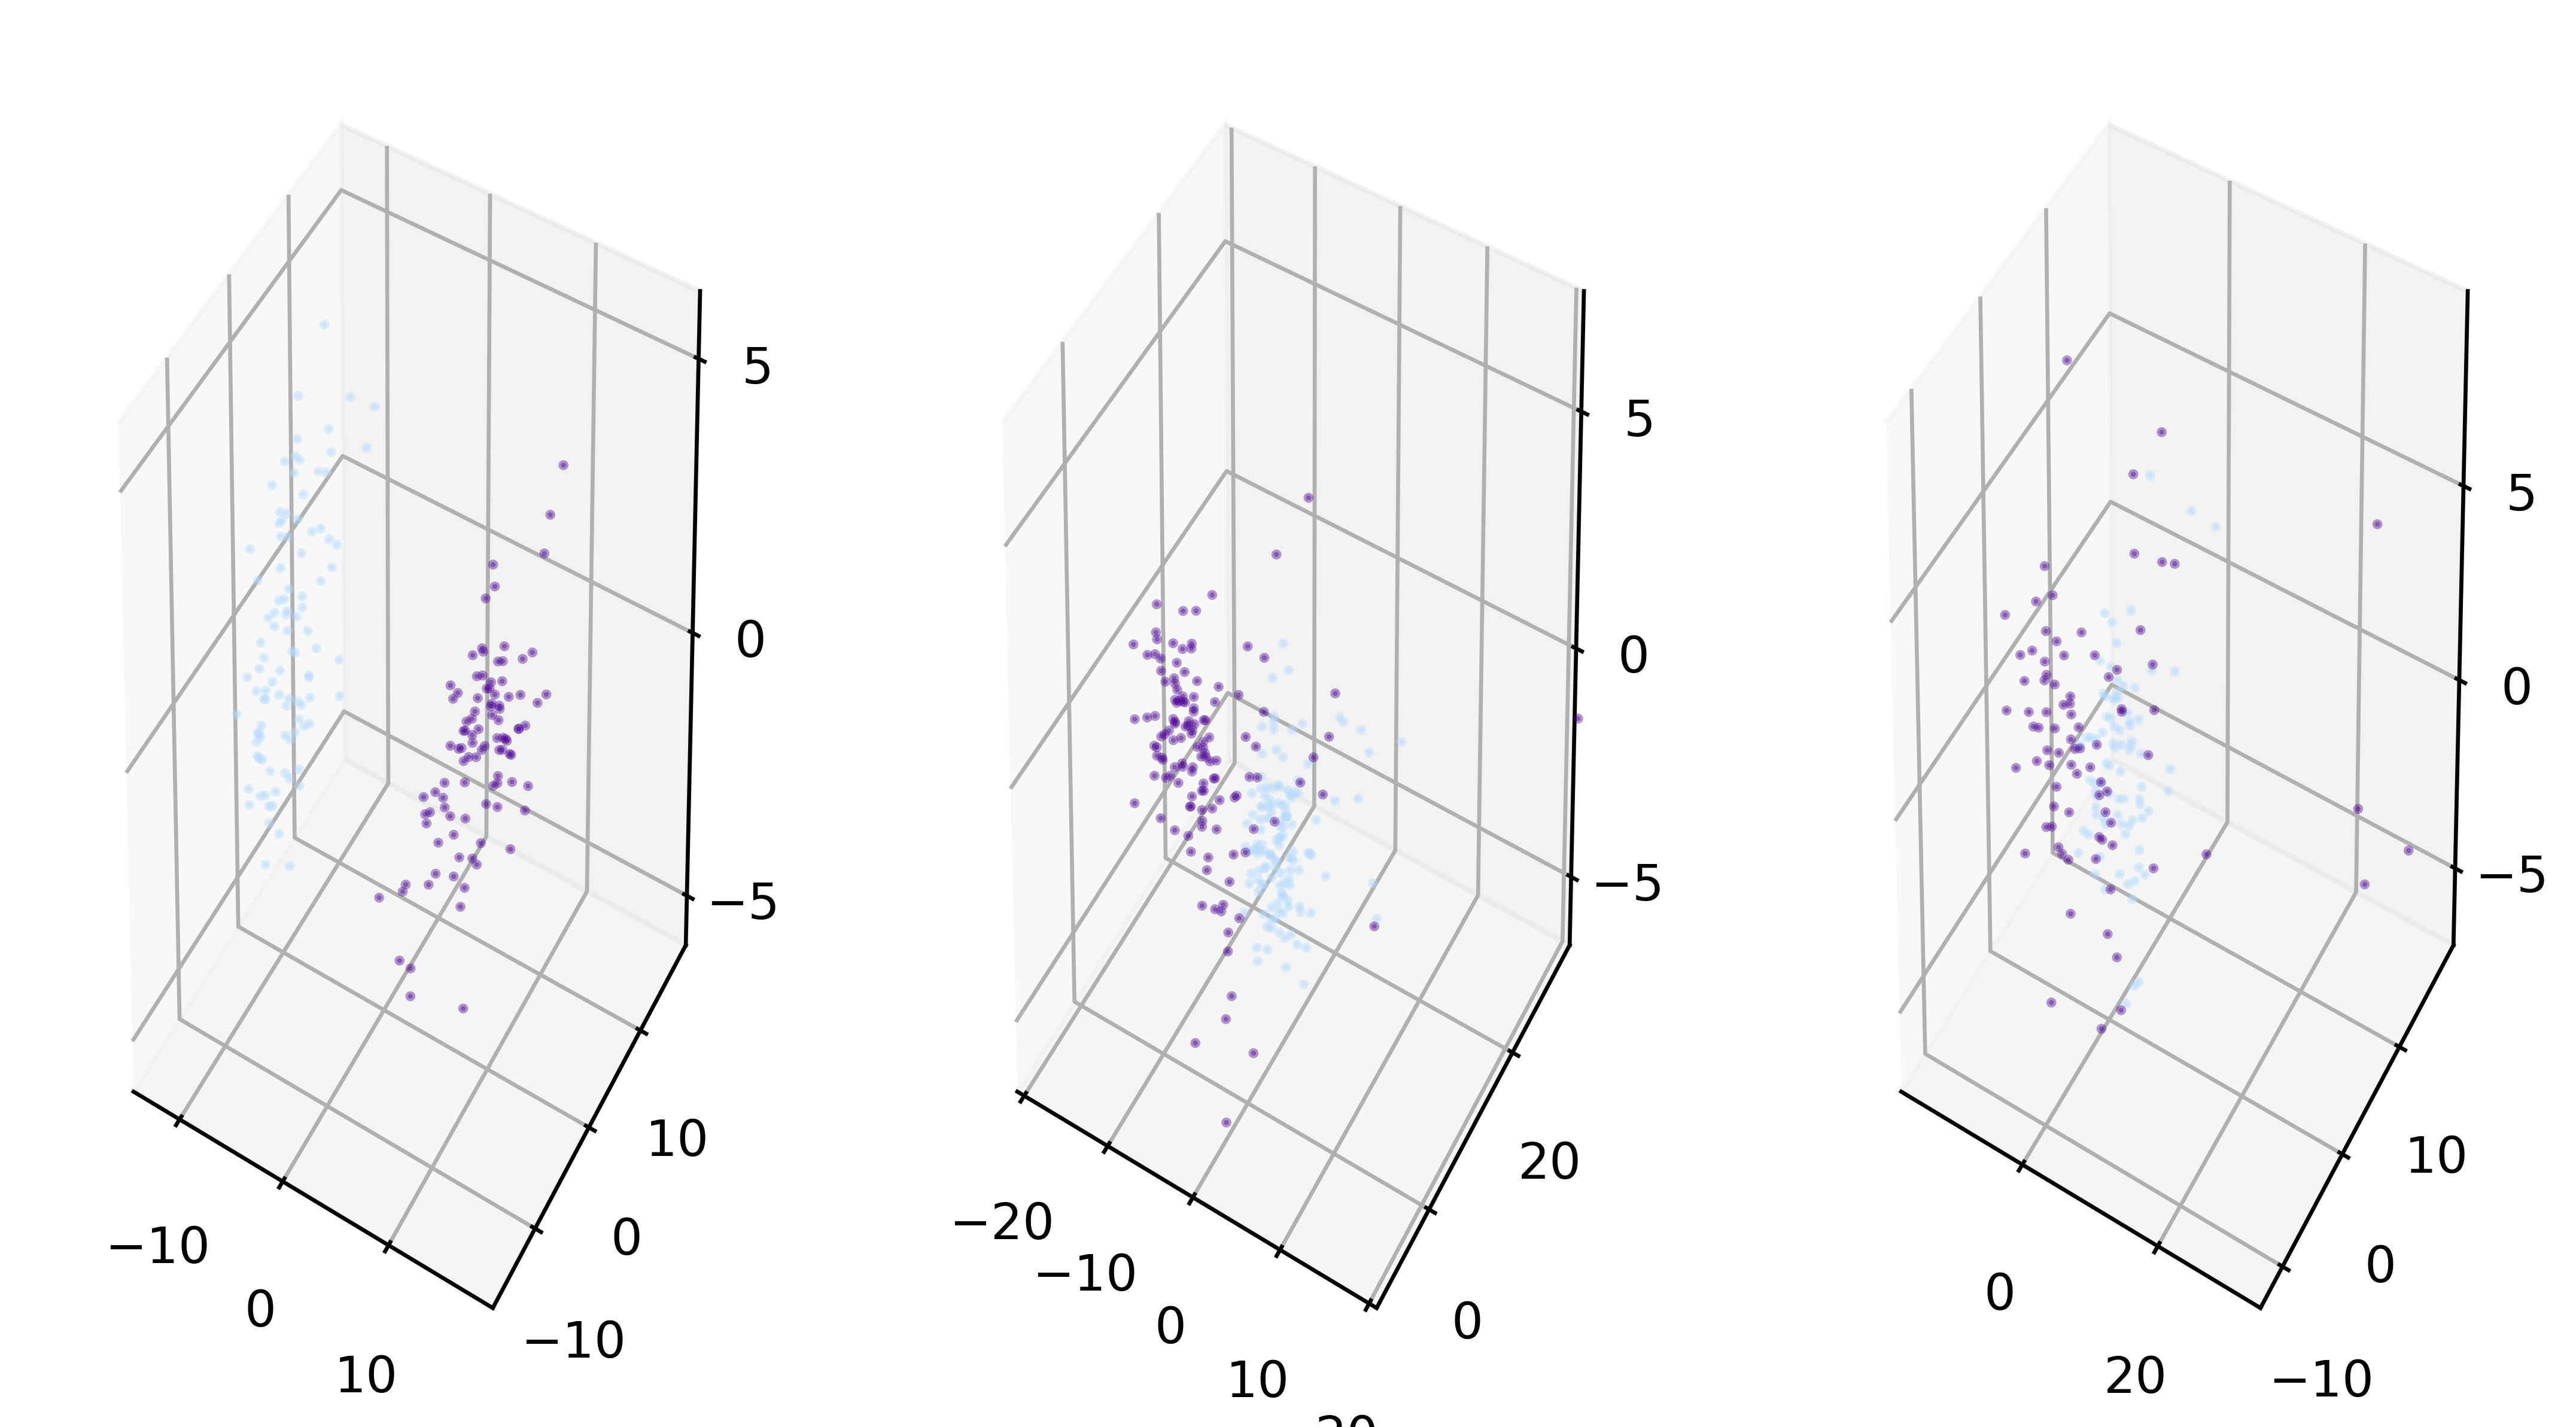

In [70]:
subsize = 8
bigsize = 12
ticksize = 8

fig = plt.figure(figsize=(9, 5), dpi = 300,)

#===============
# First subplot
#===============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

# Plot the 3D Scatter
plot_the_pca_scatter_3d(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  
                        channel=z007_chan, 
                        Num_Epochs=int(z007_Pxx_norm.shape[0]/2), 
                        ax=ax1)


#===============
# Second subplot
#===============
# set up the axes for the second plot
ax2 = fig.add_subplot(1, 3, 2, projection='3d')

# Plot the 3D Scatter
plot_the_pca_scatter_3d(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  
                        channel=z020_chan, 
                        Num_Epochs=int(z020_Pxx_norm.shape[0]/2), 
                        ax=ax2)
# ax2.set_ylim()
ax2.set_xlim(-20,20)




#===============
# Third subplot
#===============
# set up the axes for the Third plot
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

# Plot the 3D Scatter
plot_the_pca_scatter_3d(Pxx_norm=z017_Pxx_norm, pca=z017_pca, 
                        channel=z017_chan, 
                        Num_Epochs=int(z017_Pxx_norm.shape[0]/2), 
                        ax=ax3)
# ax3.set_ylim()






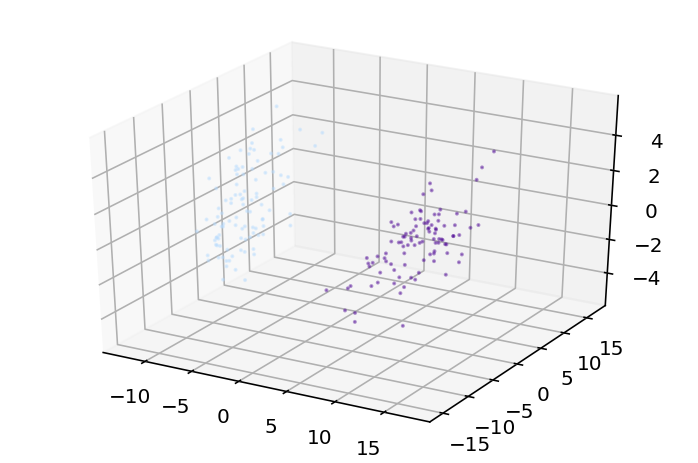

In [71]:
plot_the_pca_scatter_3d(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  
                        channel=z007_chan, 
                        Num_Epochs=int(z007_Pxx_norm.shape[0]/2))

(-6, 6)

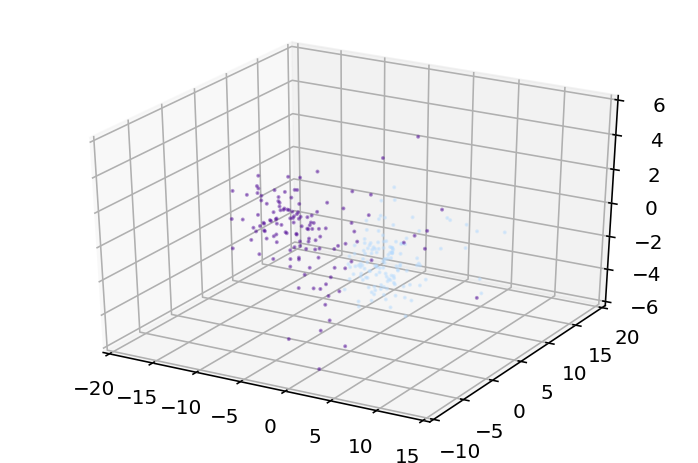

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_the_pca_scatter_3d(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  
                        channel=z020_chan, 
                        Num_Epochs=int(z020_Pxx_norm.shape[0]/2), ax=ax)

ax.set_xlim(-20,15)
ax.set_ylim(-10,20)
ax.set_zlim(-6,6)




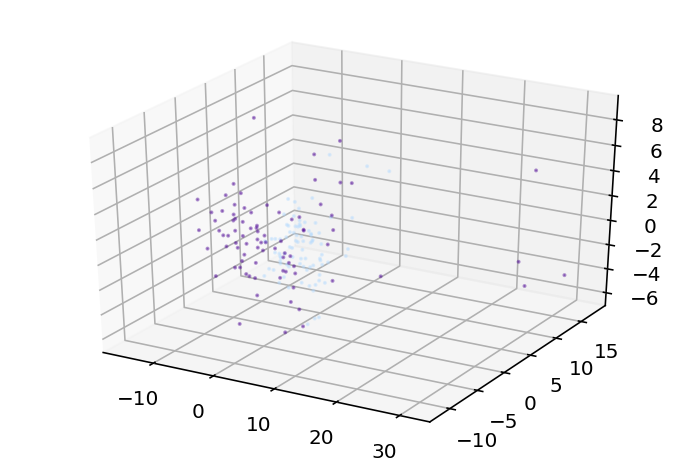

In [73]:
plot_the_pca_scatter_3d(Pxx_norm=z017_Pxx_norm, pca=z017_pca, 
                        channel=z017_chan, 
                        Num_Epochs=int(z017_Pxx_norm.shape[0]/2))

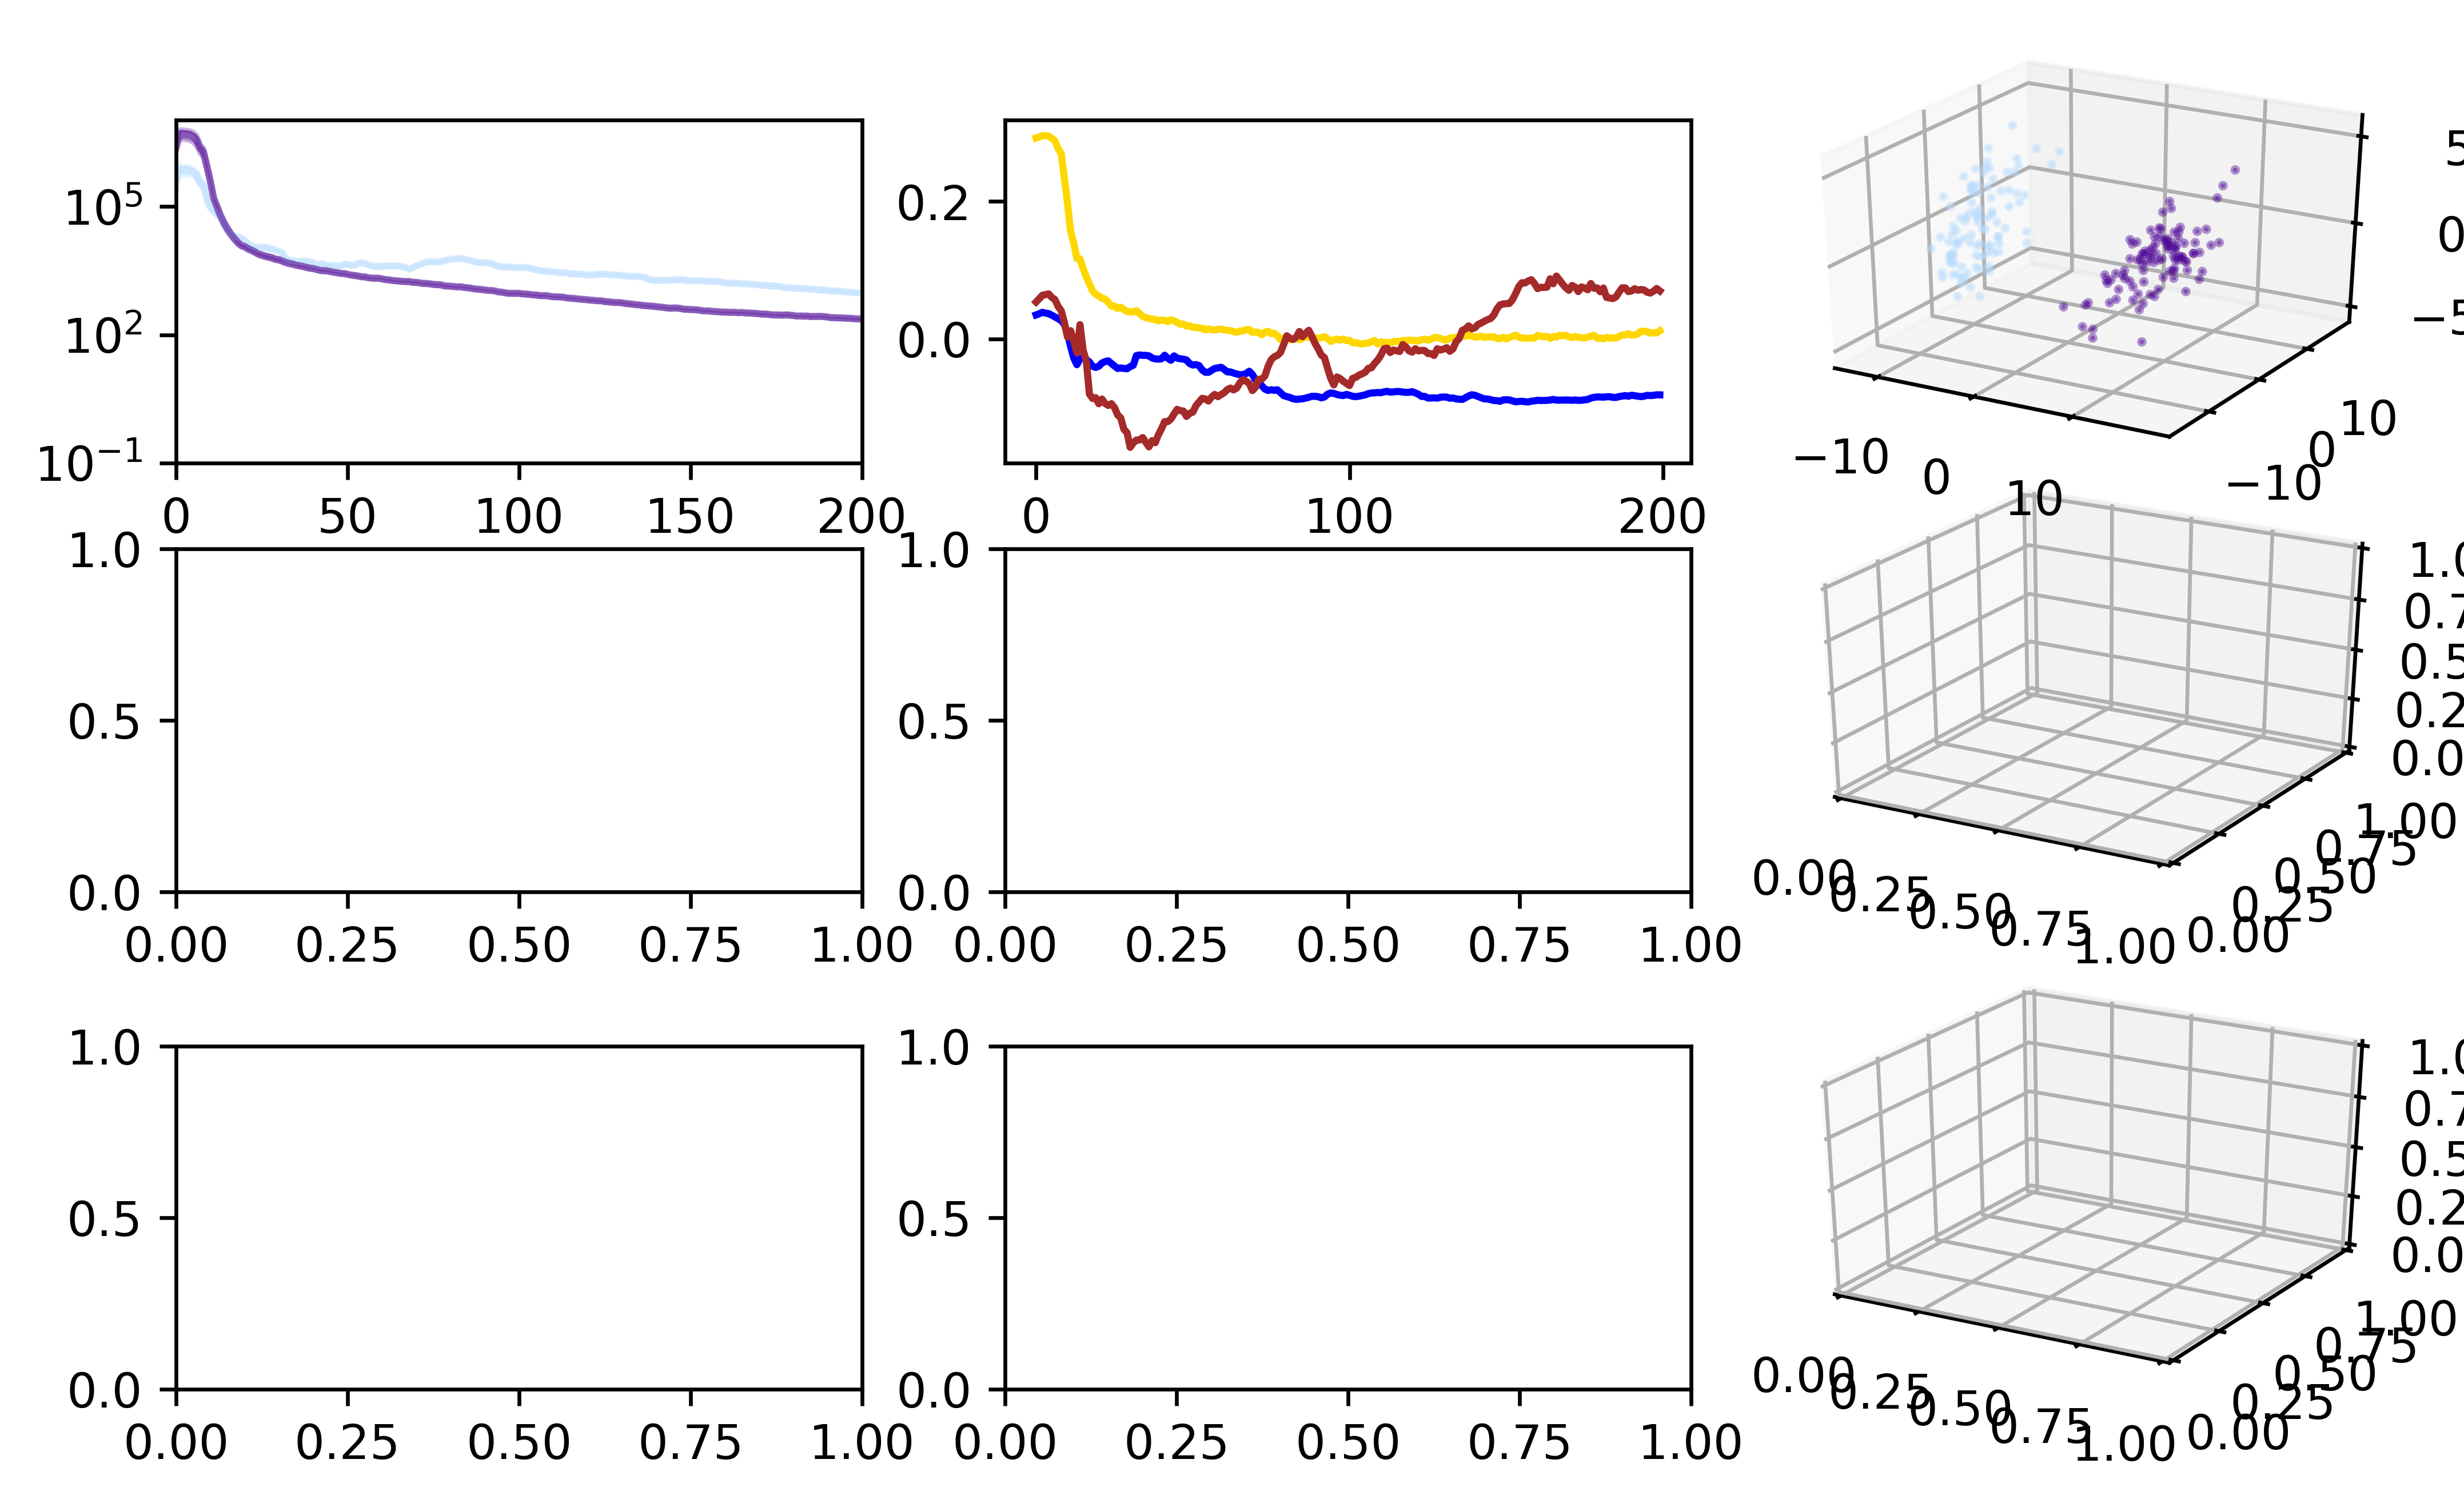

In [74]:
fig = plt.figure(figsize=(7.5, 4.5), dpi = 300)


# Make the Subplots
# Color Labels
ax_z017_1 = fig.add_axes([0.05556, 0.04, 0.26667, 0.2222])
# Pressure Waveform
ax_z017_2 = fig.add_axes([0.37779, 0.04, 0.26667, 0.2222])
# Spectrogram
ax_z017_3 = fig.add_axes([0.665, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
# Color Labels
ax_z020_1 = fig.add_axes([0.05556, 0.3622, 0.26667, 0.2222])
# Pressure Waveform
ax_z020_2 = fig.add_axes([0.37779, 0.3622, 0.26667, 0.2222])
# Spectrogram
ax_z020_3 = fig.add_axes([0.665, 0.3622, 0.26667, 0.27778], projection='3d')
# Color Labels

# ax_z020_1 = fig.add_axes([0.37779, 0.63995, 0.26667, 0.2222])
# # Pressure Waveform
# ax_z020_2 = fig.add_axes([0.37779, 0.3622, 0.26667, 0.2222])
# ax_z020_3 = fig.add_axes([0.37779, 0.04, 0.26667, 0.27778], ylim=(-1.2, 1.2))


# Make the Subplots
# Color Labels
ax_z007_1 = fig.add_axes([0.05556, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z007_2 = fig.add_axes([0.37779, 0.63995, 0.26667, 0.2222])
# Spectrogram
ax_z007_3 = fig.add_axes([0.665, 0.63995, 0.26667, 0.27778], projection='3d')

# # Make the Subplots
# # Color Labels
# ax1 = fig.add_axes([0.0333, 0.6723, 0.933, 0.2727], frame_on=False, xticklabels=[], ylim=(0, 1))
# # Pressure Waveform
# ax2 = fig.add_axes([0.0333, 0.4863, 0.933, 0.133], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# # Spectrogram
# ax3 = fig.add_axes([0.0333, 0.1263, 0.933, 0.363], ylim=(-1.2, 1.2))


## PSD
plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,0,:], 
                       freqs=z007_freqs, 
                       num_trials=int(z007_Pxx_concat.shape[0]/2), ax=ax_z007_1)

# PSCs

z007_pca = run_local_pca_analysis(Pxx_norm= z007_Pxx_norm, channel= 0)
plot_the_pscs(pca=z007_pca, ax=ax_z007_2)

# Plot the 3D Scatter
plot_the_pca_scatter_3d(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  channel=0, Num_Epochs=int(z007_Pxx_norm.shape[0]/2), ax=ax_z007_3)




plt.show()



In [75]:
 0.35222 - (0.05556 + 0.26667)

0.02998999999999996

In [76]:
(1 - (0.66002 + 0.26667)) * 7

0.5131699999999999

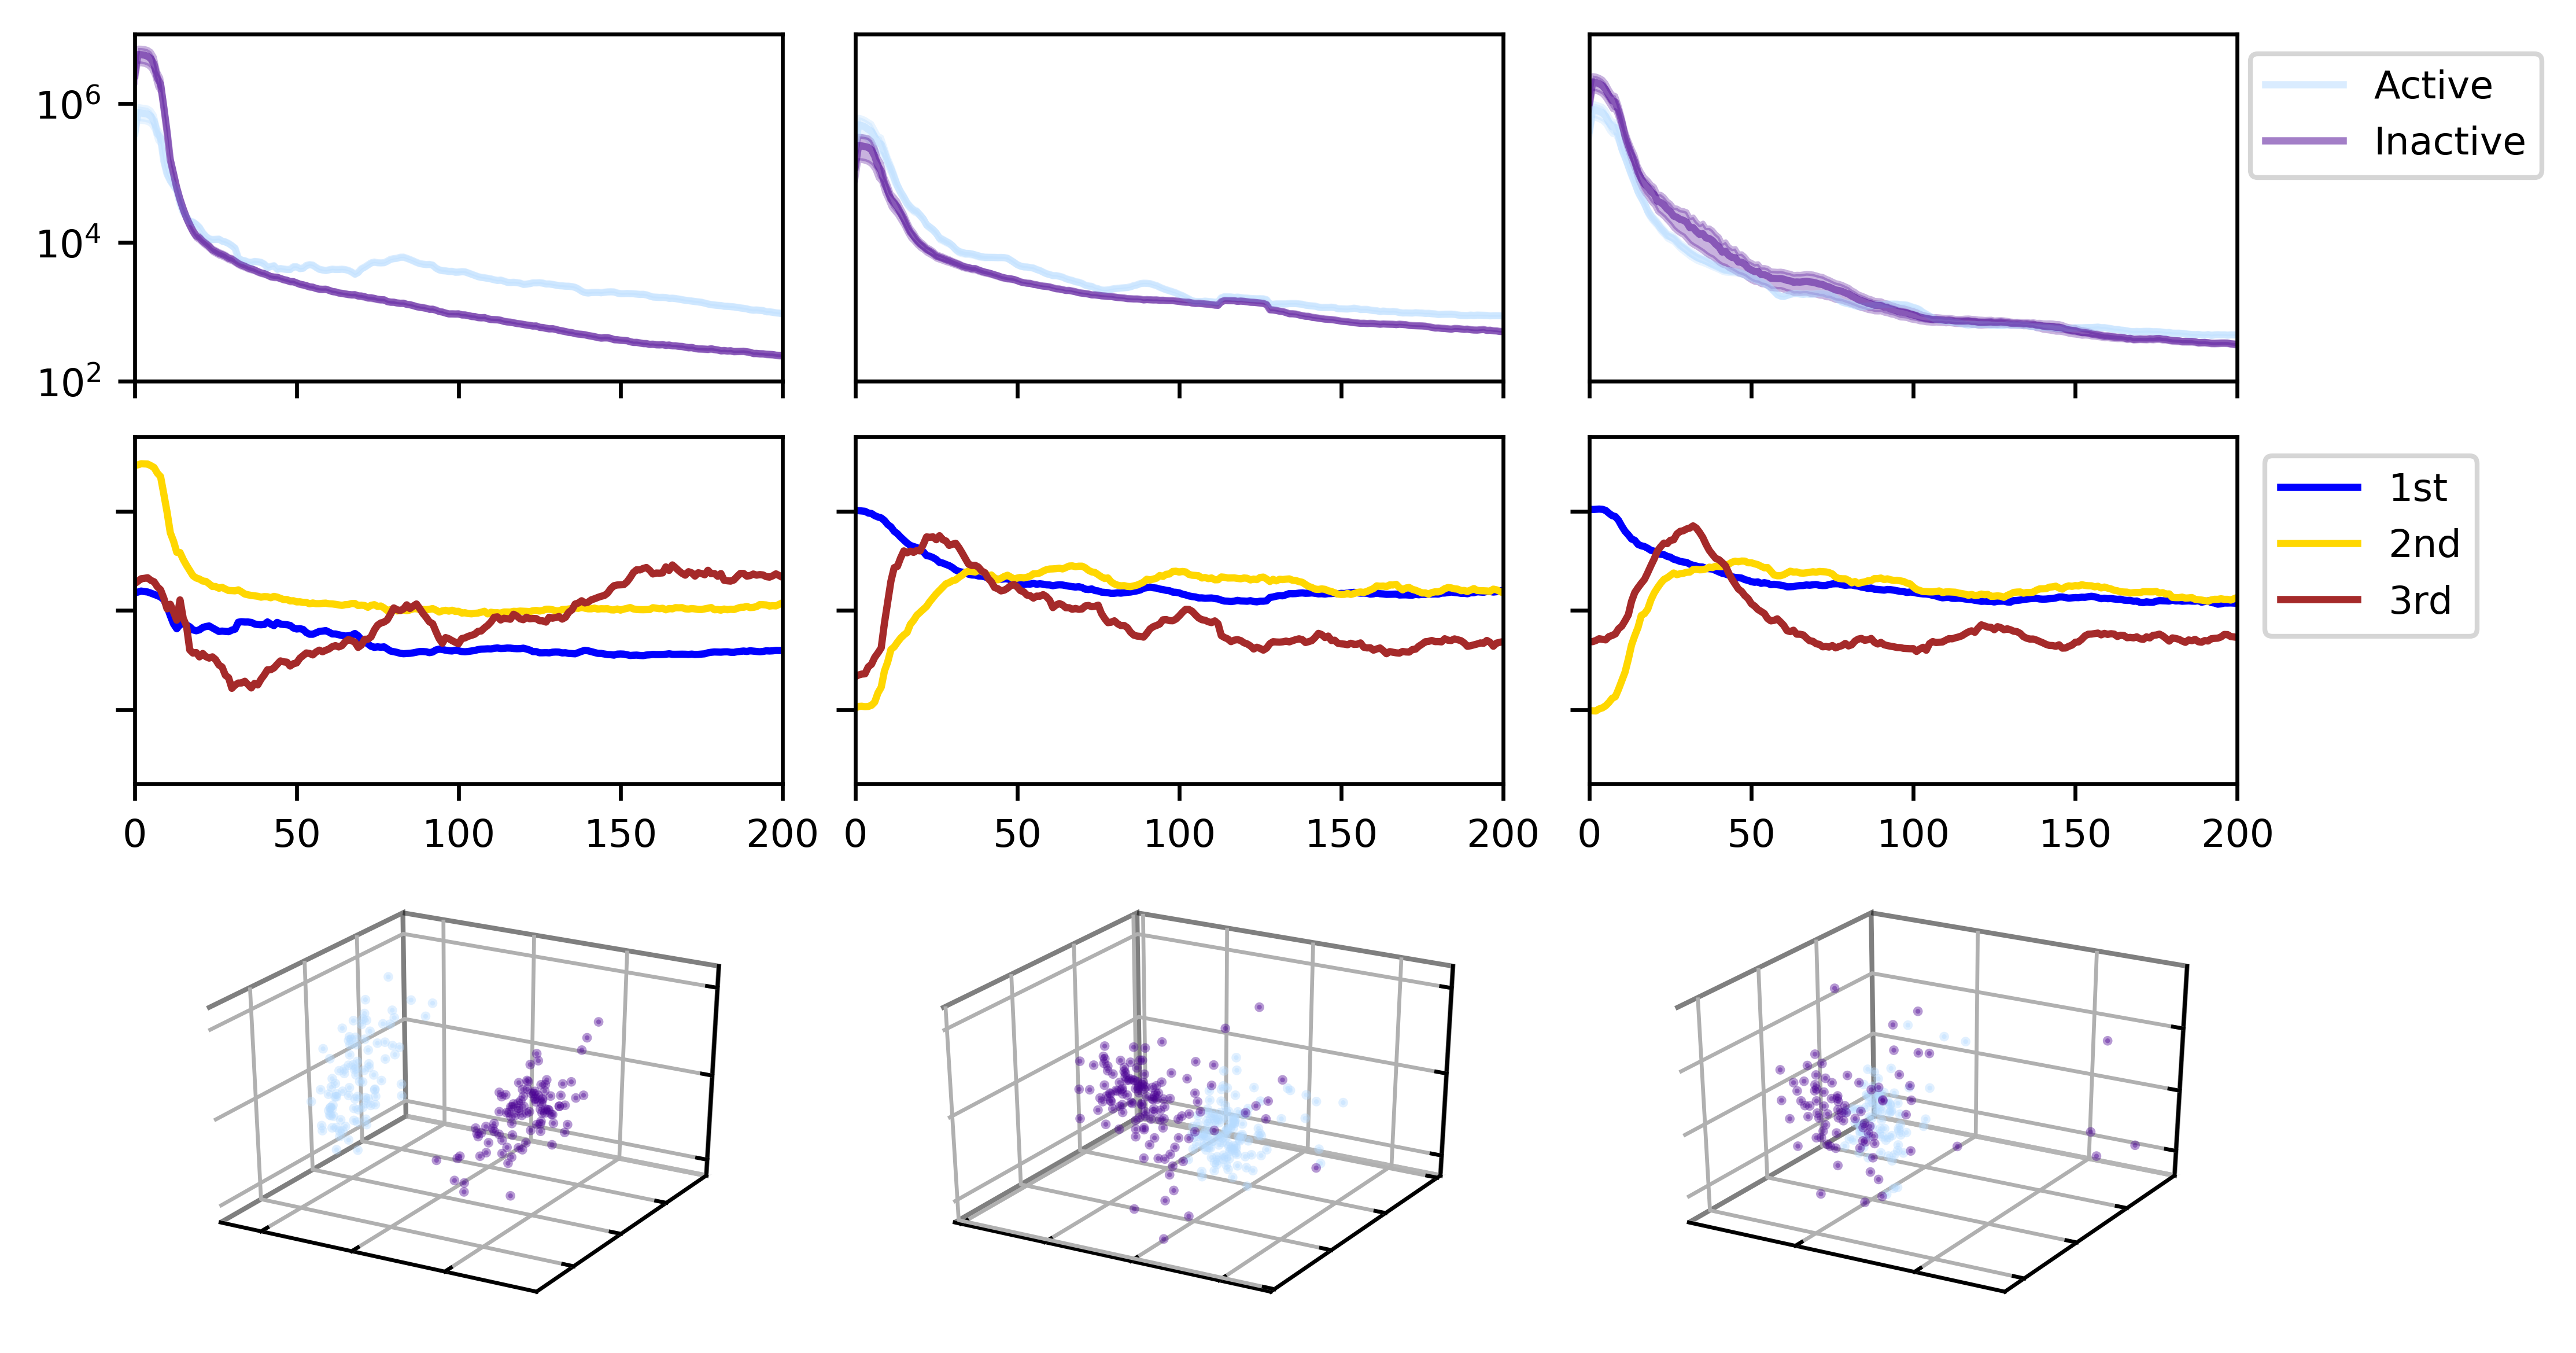

In [77]:
fig = plt.figure(figsize=(7, 4.5), dpi = 300)

yticksize = 4


# Make the Subplots
# Color Labels
ax_z007_1 = fig.add_axes([0.05556, 0.63995, 0.26667, 0.2222])

ax_z007_2 = fig.add_axes([0.05556, 0.3822, 0.26667, 0.2222])

ax_z007_3 = fig.add_axes([0.05556, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
ax_z020_1 = fig.add_axes([0.35222, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z020_2 = fig.add_axes([0.35222, 0.3822, 0.26667, 0.2222])

ax_z020_3 = fig.add_axes([0.35779, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
ax_z017_1 = fig.add_axes([0.65445, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z017_2 = fig.add_axes([0.65445, 0.3822, 0.26667, 0.2222])
# Spectrogram
ax_z017_3 = fig.add_axes([0.66002, 0.04, 0.26667, 0.27778], projection='3d')


# # Make the Subplots
# # Color Labels
# ax1 = fig.add_axes([0.0333, 0.6723, 0.933, 0.2727], frame_on=False, xticklabels=[], ylim=(0, 1))
# # Pressure Waveform
# ax2 = fig.add_axes([0.0333, 0.4863, 0.933, 0.133], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# # Spectrogram
# ax3 = fig.add_axes([0.0333, 0.1263, 0.933, 0.363], ylim=(-1.2, 1.2))


# Plot the Componenets of z007
## PSD
plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,0,:], 
                       freqs=z007_freqs, 
                       num_trials=int(z007_Pxx_concat.shape[0]/2), ax=ax_z007_1)
ax_z007_1.set_ylim(bottom=100, top = 10e6)
ax_z007_1.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z007_1.set_xticklabels([])
# ax_z007_1.tick_params(axis='x', which='both',length=0)


## PSCs
z007_pca = run_local_pca_analysis(Pxx_norm= z007_Pxx_norm, channel= 0)
plot_the_pscs(pca=z007_pca, ax=ax_z007_2)
ax_z007_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z007_2.tick_params(axis='y', which='both',length=yticksize)
# ax[3].axhline(y=0, color = 'black', alpha=.5)
ax_z007_2.set_ylim([-.35, .35])
ax_z007_2.set_xlim([0, 200])
ax_z007_2.set_yticklabels([])

## Plot the 3D Scatter
plot_the_pca_scatter_3d(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  
                        channel=0, 
                        Num_Epochs=int(z007_Pxx_norm.shape[0]/2), background=False, ax=ax_z007_3)
ax_z007_3.set_xticklabels([])
ax_z007_3.set_yticklabels([])
ax_z007_3.set_zticklabels([])
ax_z007_3.tick_params(axis='both', which='both',length=yticksize)


# Plot the Componenets of z020
## PSD
plot_summary_psd_paper(Pxx_concat=z020_Pxx_concat[:,z020_chan,:], 
                       freqs=z020_freqs, 
                       num_trials=int(z020_Pxx_concat.shape[0]/2), ax=ax_z020_1)
# ax[1].set_ylim(bottom=100)
ax_z020_1.set_ylim(bottom=100, top = 10e6)
ax_z020_1.set_yticklabels([])
ax_z020_1.tick_params(axis='both', which='major', labelsize=ticksize)

visible_yticks = []
visible_ytickslabels = []
for ind, label in enumerate(ax_z020_1.get_yticklabels()):
    if label in [10^2, 10^4, 10^6]:
#             label.set_visible(True)
        visible_yticks.append(ind)
        visible_ytickslabels.append(label)
#         else:
#             label.set_visible(False)
ax_z020_1.set_yticks(visible_yticks) 


ax_z020_1.set_xticklabels([])
# ax_z020_1.tick_params(axis='x', which='both',length=0)




# PSCs
z020_pca = run_local_pca_analysis(Pxx_norm= z020_Pxx_norm, channel= z020_chan)
plot_the_pscs(pca=z020_pca, ax=ax_z020_2)
# ax[3].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax_z020_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z020_2.tick_params(axis='y', which='both',length=yticksize)
# ax[4].axhline(y=0, color = 'black', alpha=.5)
ax_z020_2.set_ylim([-.35, .35])
ax_z020_2.set_yticklabels([])
ax_z020_2.set_xlim([0, 200])

# Scatter
plot_the_pca_scatter_3d(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  
                        channel=z020_chan, 
                        Num_Epochs=int(z020_Pxx_norm.shape[0]/2), background=False, ax=ax_z020_3)
ax_z020_3.set_xticklabels([])
ax_z020_3.set_yticklabels([])
ax_z020_3.set_zticklabels([])
ax_z020_3.tick_params(axis='both', which='both',length=yticksize)
ax_z020_3.set_xlim(-20,15)
ax_z020_3.set_ylim(-10,20)
ax_z020_3.set_zlim(-6,6)



# z017
## PSD
plot_summary_psd_paper(Pxx_concat=z017_Pxx_concat[:,z017_chan,:], 
                       freqs=z017_freqs, 
                       num_trials=int(z017_Pxx_concat.shape[0]/2), ax=ax_z017_1)
# ax_z017_1.set_ylim(bottom=100)
ax_z017_1.set_ylim(bottom=100, top = 10e6)
visible_yticks = []
visible_ytickslabels = []
for ind, label in enumerate(ax_z017_1.get_yticklabels()):
    if label in [10^2, 10^4, 10^6]:
#             label.set_visible(True)
        visible_yticks.append(ind)
        visible_ytickslabels.append(label)
#         else:
#             label.set_visible(False)
ax_z017_1.set_yticks(visible_yticks) 
ax_z017_1.set_yticklabels([])

ax_z017_1.set_xticklabels([])
ax_z017_1.legend(loc='best', fontsize=8, bbox_to_anchor=(.5, 0, 1, 1))
# ax_z017_1.tick_params(axis='x', which='both',length=0)




# PSCs
z017_pca = run_local_pca_analysis(Pxx_norm= z017_Pxx_norm, channel= z017_chan)
plot_the_pscs(pca=z017_pca, ax=ax_z017_2)
# ax_z017_2.plot(z017_pca.components_[0, :], label='1st', color = 'blue')
# ax_z017_2.plot(z017_pca.components_[1, :], label='2nd', color = 'gold')
# ax_z017_2.plot(z017_pca.components_[2, :]*-1, label='3rd', color = 'brown')

# ax[5].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax_z017_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z017_2.tick_params(axis='y', which='both',length=yticksize)
# ax_z017_2.axhline(y=0, color = 'black', alpha=.5)
ax_z017_2.set_ylim([-.35, .35])
ax_z017_2.set_yticklabels([])
ax_z017_2.set_xlim([0, 200])
ax_z017_2.legend(loc='best', fontsize=8, bbox_to_anchor=(.4, 0, 1, 1))




# Plot 3D
plot_the_pca_scatter_3d(Pxx_norm=z017_Pxx_norm, pca=z017_pca, 
                        channel=z017_chan, 
                        Num_Epochs=int(z017_Pxx_norm.shape[0]/2), background=False, ax=ax_z017_3)
ax_z017_3.set_xticklabels([])
ax_z017_3.set_yticklabels([])
ax_z017_3.set_zticklabels([])
ax_z017_3.tick_params(axis='both', which='both',length=yticksize)

# ax.set(xlabel='component 1', ylabel='component 2', zlabel='component 3')
# ax.axis('equal')


# # Save the Figure
# figure_name = 'Summary_of_ITC' + '_Final_cb.svg'
# figure_type_folder = FIGURES_DIR / 'PSC_Summary'


# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='svg')



plt.show()






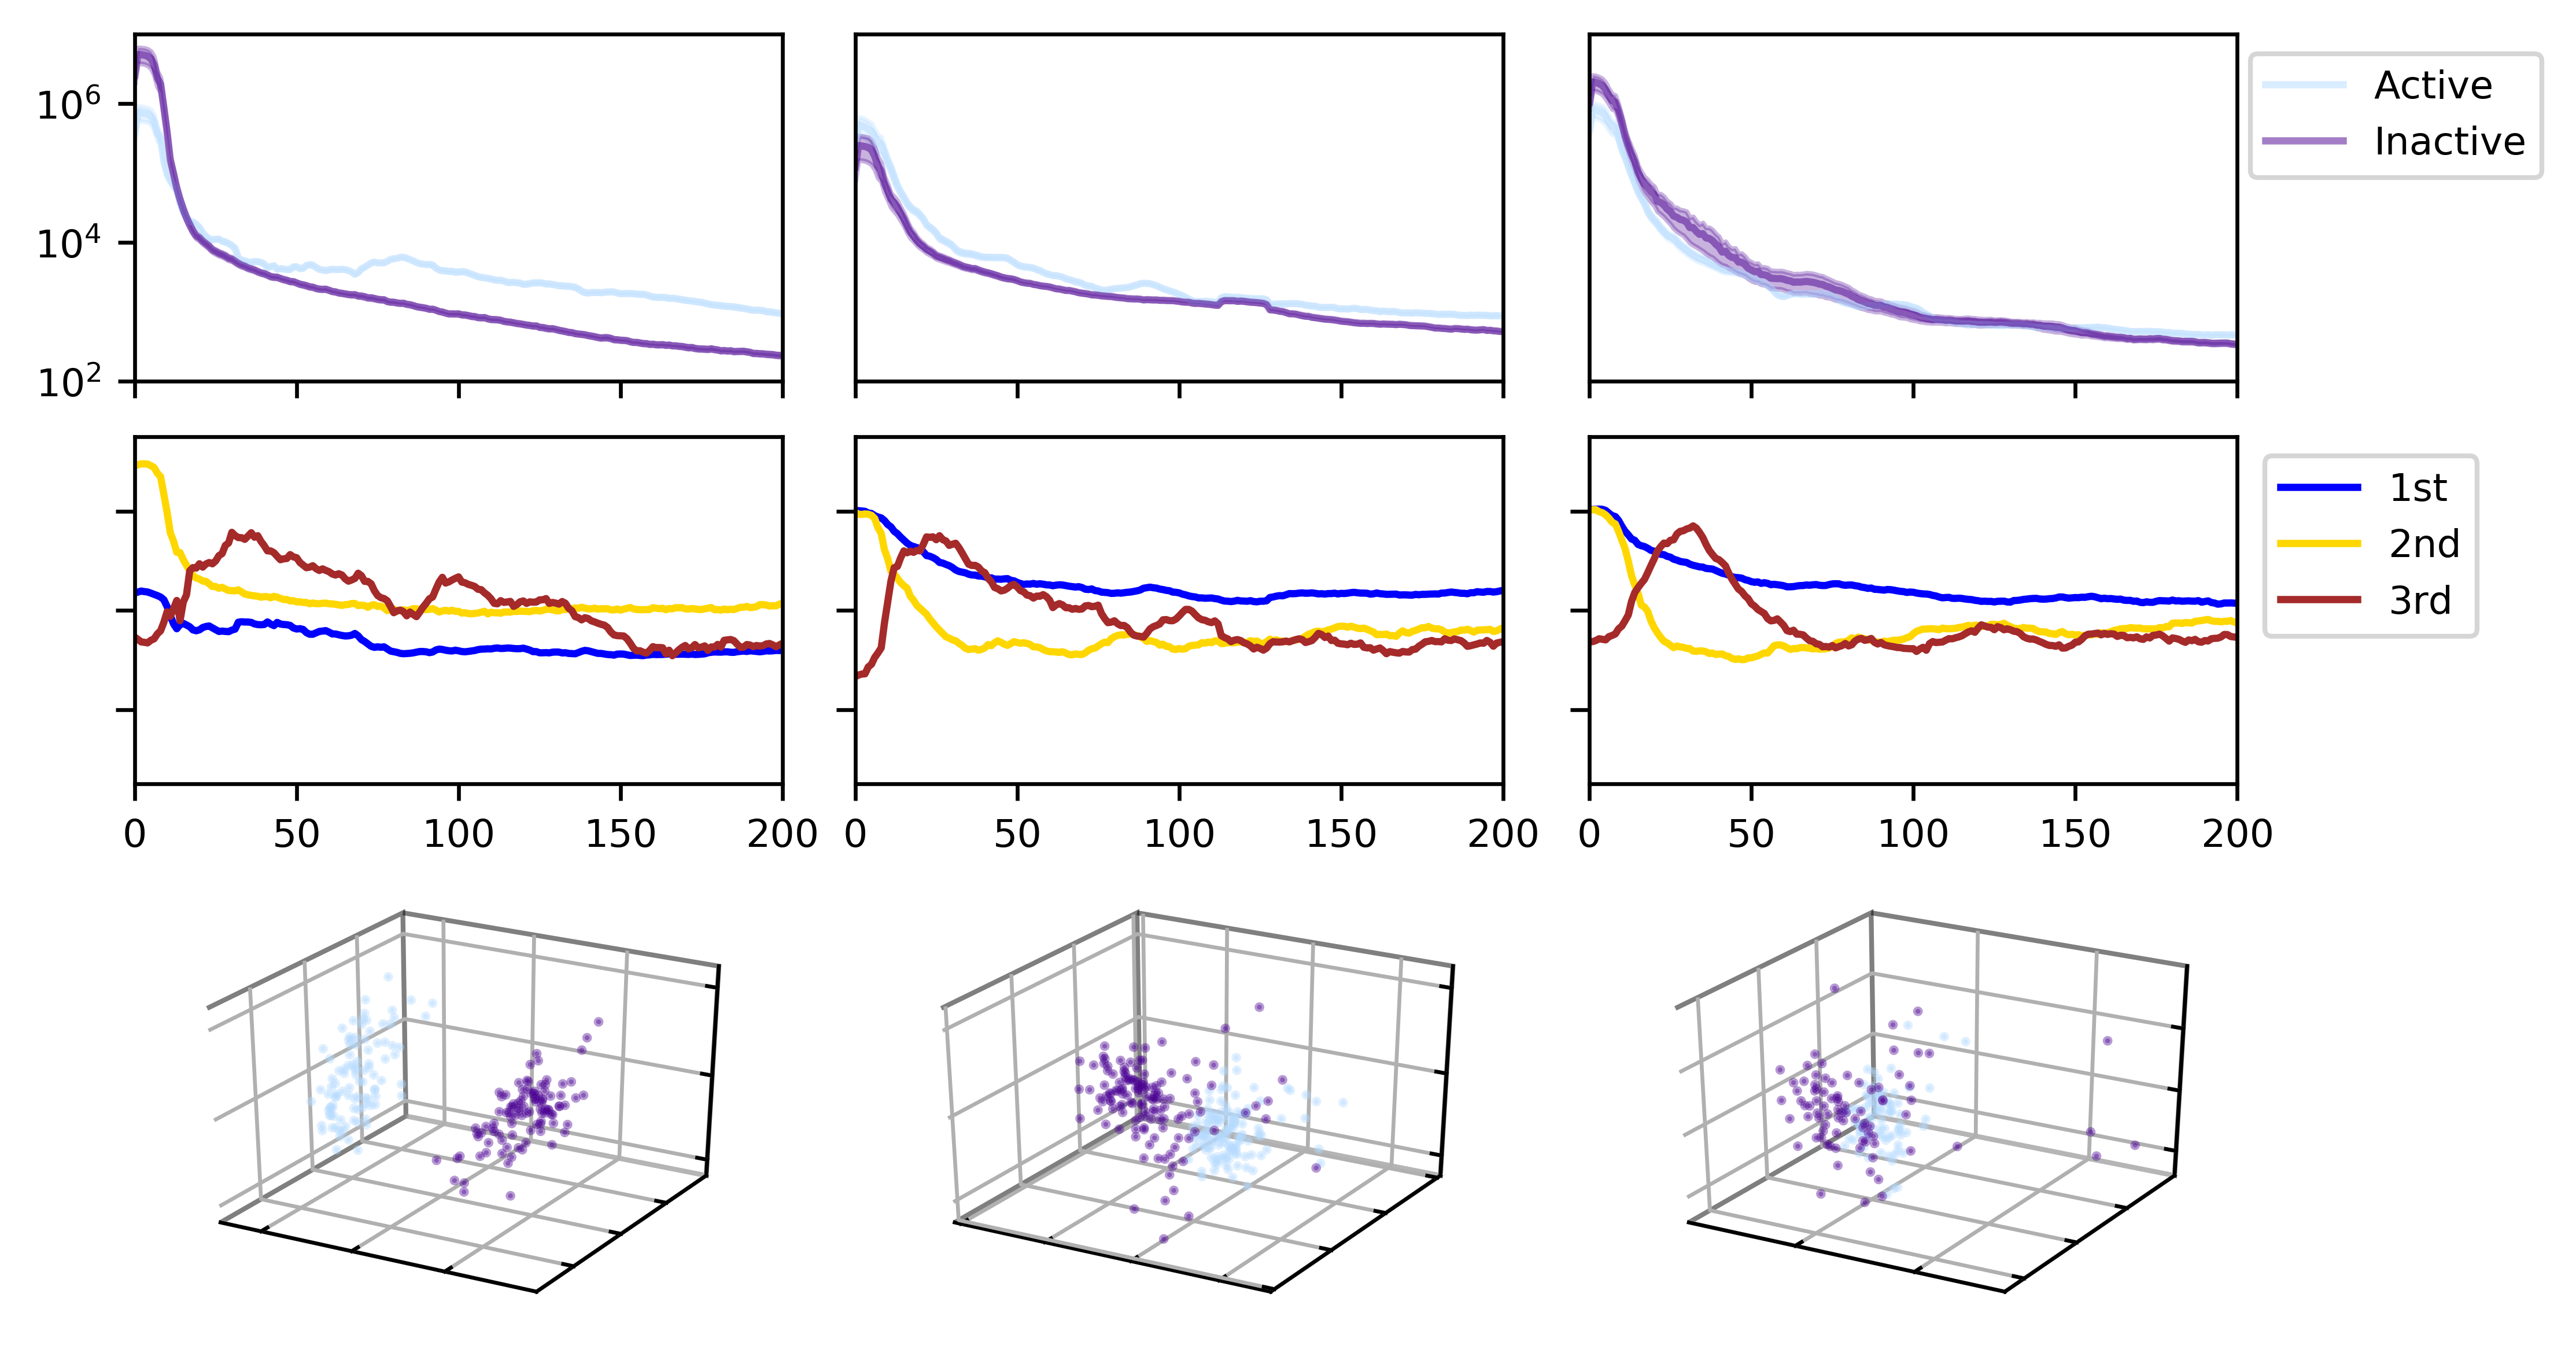

In [78]:
# Satisfying TQG's Input

fig = plt.figure(figsize=(7, 4.5), dpi = 300)

yticksize = 4


# Make the Subplots
# Color Labels
ax_z007_1 = fig.add_axes([0.05556, 0.63995, 0.26667, 0.2222])

ax_z007_2 = fig.add_axes([0.05556, 0.3822, 0.26667, 0.2222])

ax_z007_3 = fig.add_axes([0.05556, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
ax_z020_1 = fig.add_axes([0.35222, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z020_2 = fig.add_axes([0.35222, 0.3822, 0.26667, 0.2222])

ax_z020_3 = fig.add_axes([0.35779, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
ax_z017_1 = fig.add_axes([0.65445, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z017_2 = fig.add_axes([0.65445, 0.3822, 0.26667, 0.2222])
# Spectrogram
ax_z017_3 = fig.add_axes([0.66002, 0.04, 0.26667, 0.27778], projection='3d')


# # Make the Subplots
# # Color Labels
# ax1 = fig.add_axes([0.0333, 0.6723, 0.933, 0.2727], frame_on=False, xticklabels=[], ylim=(0, 1))
# # Pressure Waveform
# ax2 = fig.add_axes([0.0333, 0.4863, 0.933, 0.133], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# # Spectrogram
# ax3 = fig.add_axes([0.0333, 0.1263, 0.933, 0.363], ylim=(-1.2, 1.2))


# Plot the Componenets of z007
## PSD
plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,0,:], 
                       freqs=z007_freqs, 
                       num_trials=int(z007_Pxx_concat.shape[0]/2), ax=ax_z007_1)
ax_z007_1.set_ylim(bottom=100, top = 10e6)
ax_z007_1.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z007_1.set_xticklabels([])
# ax_z007_1.tick_params(axis='x', which='both',length=0)


## PSCs
z007_pca = run_local_pca_analysis(Pxx_norm= z007_Pxx_norm, channel= 0)
# plot_the_pscs(pca=z007_pca, ax=ax_z007_2)
plot_the_pscs_fp(pca=z007_pca, flip=[2], ax=ax_z007_2)

ax_z007_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z007_2.tick_params(axis='y', which='both',length=yticksize)
# ax[3].axhline(y=0, color = 'black', alpha=.5)
ax_z007_2.set_ylim([-.35, .35])
ax_z007_2.set_xlim([0, 200])
ax_z007_2.set_yticklabels([])

## Plot the 3D Scatter
plot_the_pca_scatter_3d(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  
                        channel=0, 
                        Num_Epochs=int(z007_Pxx_norm.shape[0]/2), background=False, ax=ax_z007_3)
ax_z007_3.set_xticklabels([])
ax_z007_3.set_yticklabels([])
ax_z007_3.set_zticklabels([])
ax_z007_3.tick_params(axis='both', which='both',length=yticksize)


# Plot the Componenets of z020
## PSD
plot_summary_psd_paper(Pxx_concat=z020_Pxx_concat[:,z020_chan,:], 
                       freqs=z020_freqs, 
                       num_trials=int(z020_Pxx_concat.shape[0]/2), ax=ax_z020_1)
# ax[1].set_ylim(bottom=100)
ax_z020_1.set_ylim(bottom=100, top = 10e6)
ax_z020_1.set_yticklabels([])
ax_z020_1.tick_params(axis='both', which='major', labelsize=ticksize)

visible_yticks = []
visible_ytickslabels = []
for ind, label in enumerate(ax_z020_1.get_yticklabels()):
    if label in [10^2, 10^4, 10^6]:
#             label.set_visible(True)
        visible_yticks.append(ind)
        visible_ytickslabels.append(label)
#         else:
#             label.set_visible(False)
ax_z020_1.set_yticks(visible_yticks) 


ax_z020_1.set_xticklabels([])
# ax_z020_1.tick_params(axis='x', which='both',length=0)




# PSCs
z020_pca = run_local_pca_analysis(Pxx_norm= z020_Pxx_norm, channel= z020_chan)
plot_the_pscs_fp(pca=z020_pca, flip=[1], ax=ax_z020_2)
# ax[3].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax_z020_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z020_2.tick_params(axis='y', which='both',length=yticksize)
# ax[4].axhline(y=0, color = 'black', alpha=.5)
ax_z020_2.set_ylim([-.35, .35])
ax_z020_2.set_yticklabels([])
ax_z020_2.set_xlim([0, 200])

# Scatter
plot_the_pca_scatter_3d(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  
                        channel=z020_chan, 
                        Num_Epochs=int(z020_Pxx_norm.shape[0]/2), background=False, ax=ax_z020_3)
ax_z020_3.set_xticklabels([])
ax_z020_3.set_yticklabels([])
ax_z020_3.set_zticklabels([])
ax_z020_3.tick_params(axis='both', which='both',length=yticksize)
ax_z020_3.set_xlim(-20,15)
ax_z020_3.set_ylim(-10,20)
ax_z020_3.set_zlim(-6,6)



# z017
## PSD
plot_summary_psd_paper(Pxx_concat=z017_Pxx_concat[:,z017_chan,:], 
                       freqs=z017_freqs, 
                       num_trials=int(z017_Pxx_concat.shape[0]/2), ax=ax_z017_1)
# ax_z017_1.set_ylim(bottom=100)
ax_z017_1.set_ylim(bottom=100, top = 10e6)
visible_yticks = []
visible_ytickslabels = []
for ind, label in enumerate(ax_z017_1.get_yticklabels()):
    if label in [10^2, 10^4, 10^6]:
#             label.set_visible(True)
        visible_yticks.append(ind)
        visible_ytickslabels.append(label)
#         else:
#             label.set_visible(False)
ax_z017_1.set_yticks(visible_yticks) 
ax_z017_1.set_yticklabels([])

ax_z017_1.set_xticklabels([])
ax_z017_1.legend(loc='best', fontsize=8, bbox_to_anchor=(.5, 0, 1, 1))
# ax_z017_1.tick_params(axis='x', which='both',length=0)




# PSCs
z017_pca = run_local_pca_analysis(Pxx_norm= z017_Pxx_norm, channel= z017_chan)
plot_the_pscs_fp(pca=z017_pca, flip=[1], ax=ax_z017_2)
# ax_z017_2.plot(z017_pca.components_[0, :], label='1st', color = 'blue')
# ax_z017_2.plot(z017_pca.components_[1, :], label='2nd', color = 'gold')
# ax_z017_2.plot(z017_pca.components_[2, :]*-1, label='3rd', color = 'brown')

# ax[5].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax_z017_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z017_2.tick_params(axis='y', which='both',length=yticksize)
# ax_z017_2.axhline(y=0, color = 'black', alpha=.5)
ax_z017_2.set_ylim([-.35, .35])
ax_z017_2.set_yticklabels([])
ax_z017_2.set_xlim([0, 200])
ax_z017_2.legend(loc='best', fontsize=8, bbox_to_anchor=(.4, 0, 1, 1))




# Plot 3D
plot_the_pca_scatter_3d(Pxx_norm=z017_Pxx_norm, pca=z017_pca, 
                        channel=z017_chan, 
                        Num_Epochs=int(z017_Pxx_norm.shape[0]/2), background=False, ax=ax_z017_3)
ax_z017_3.set_xticklabels([])
ax_z017_3.set_yticklabels([])
ax_z017_3.set_zticklabels([])
ax_z017_3.tick_params(axis='both', which='both',length=yticksize)

# ax.set(xlabel='component 1', ylabel='component 2', zlabel='component 3')
# ax.axis('equal')


# # Save the Figure
# figure_name = 'Summary_of_ITC' + '_Final_cb_tqg.svg'
# figure_type_folder = FIGURES_DIR / 'PSC_Summary'


# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='svg')



# plt.show()






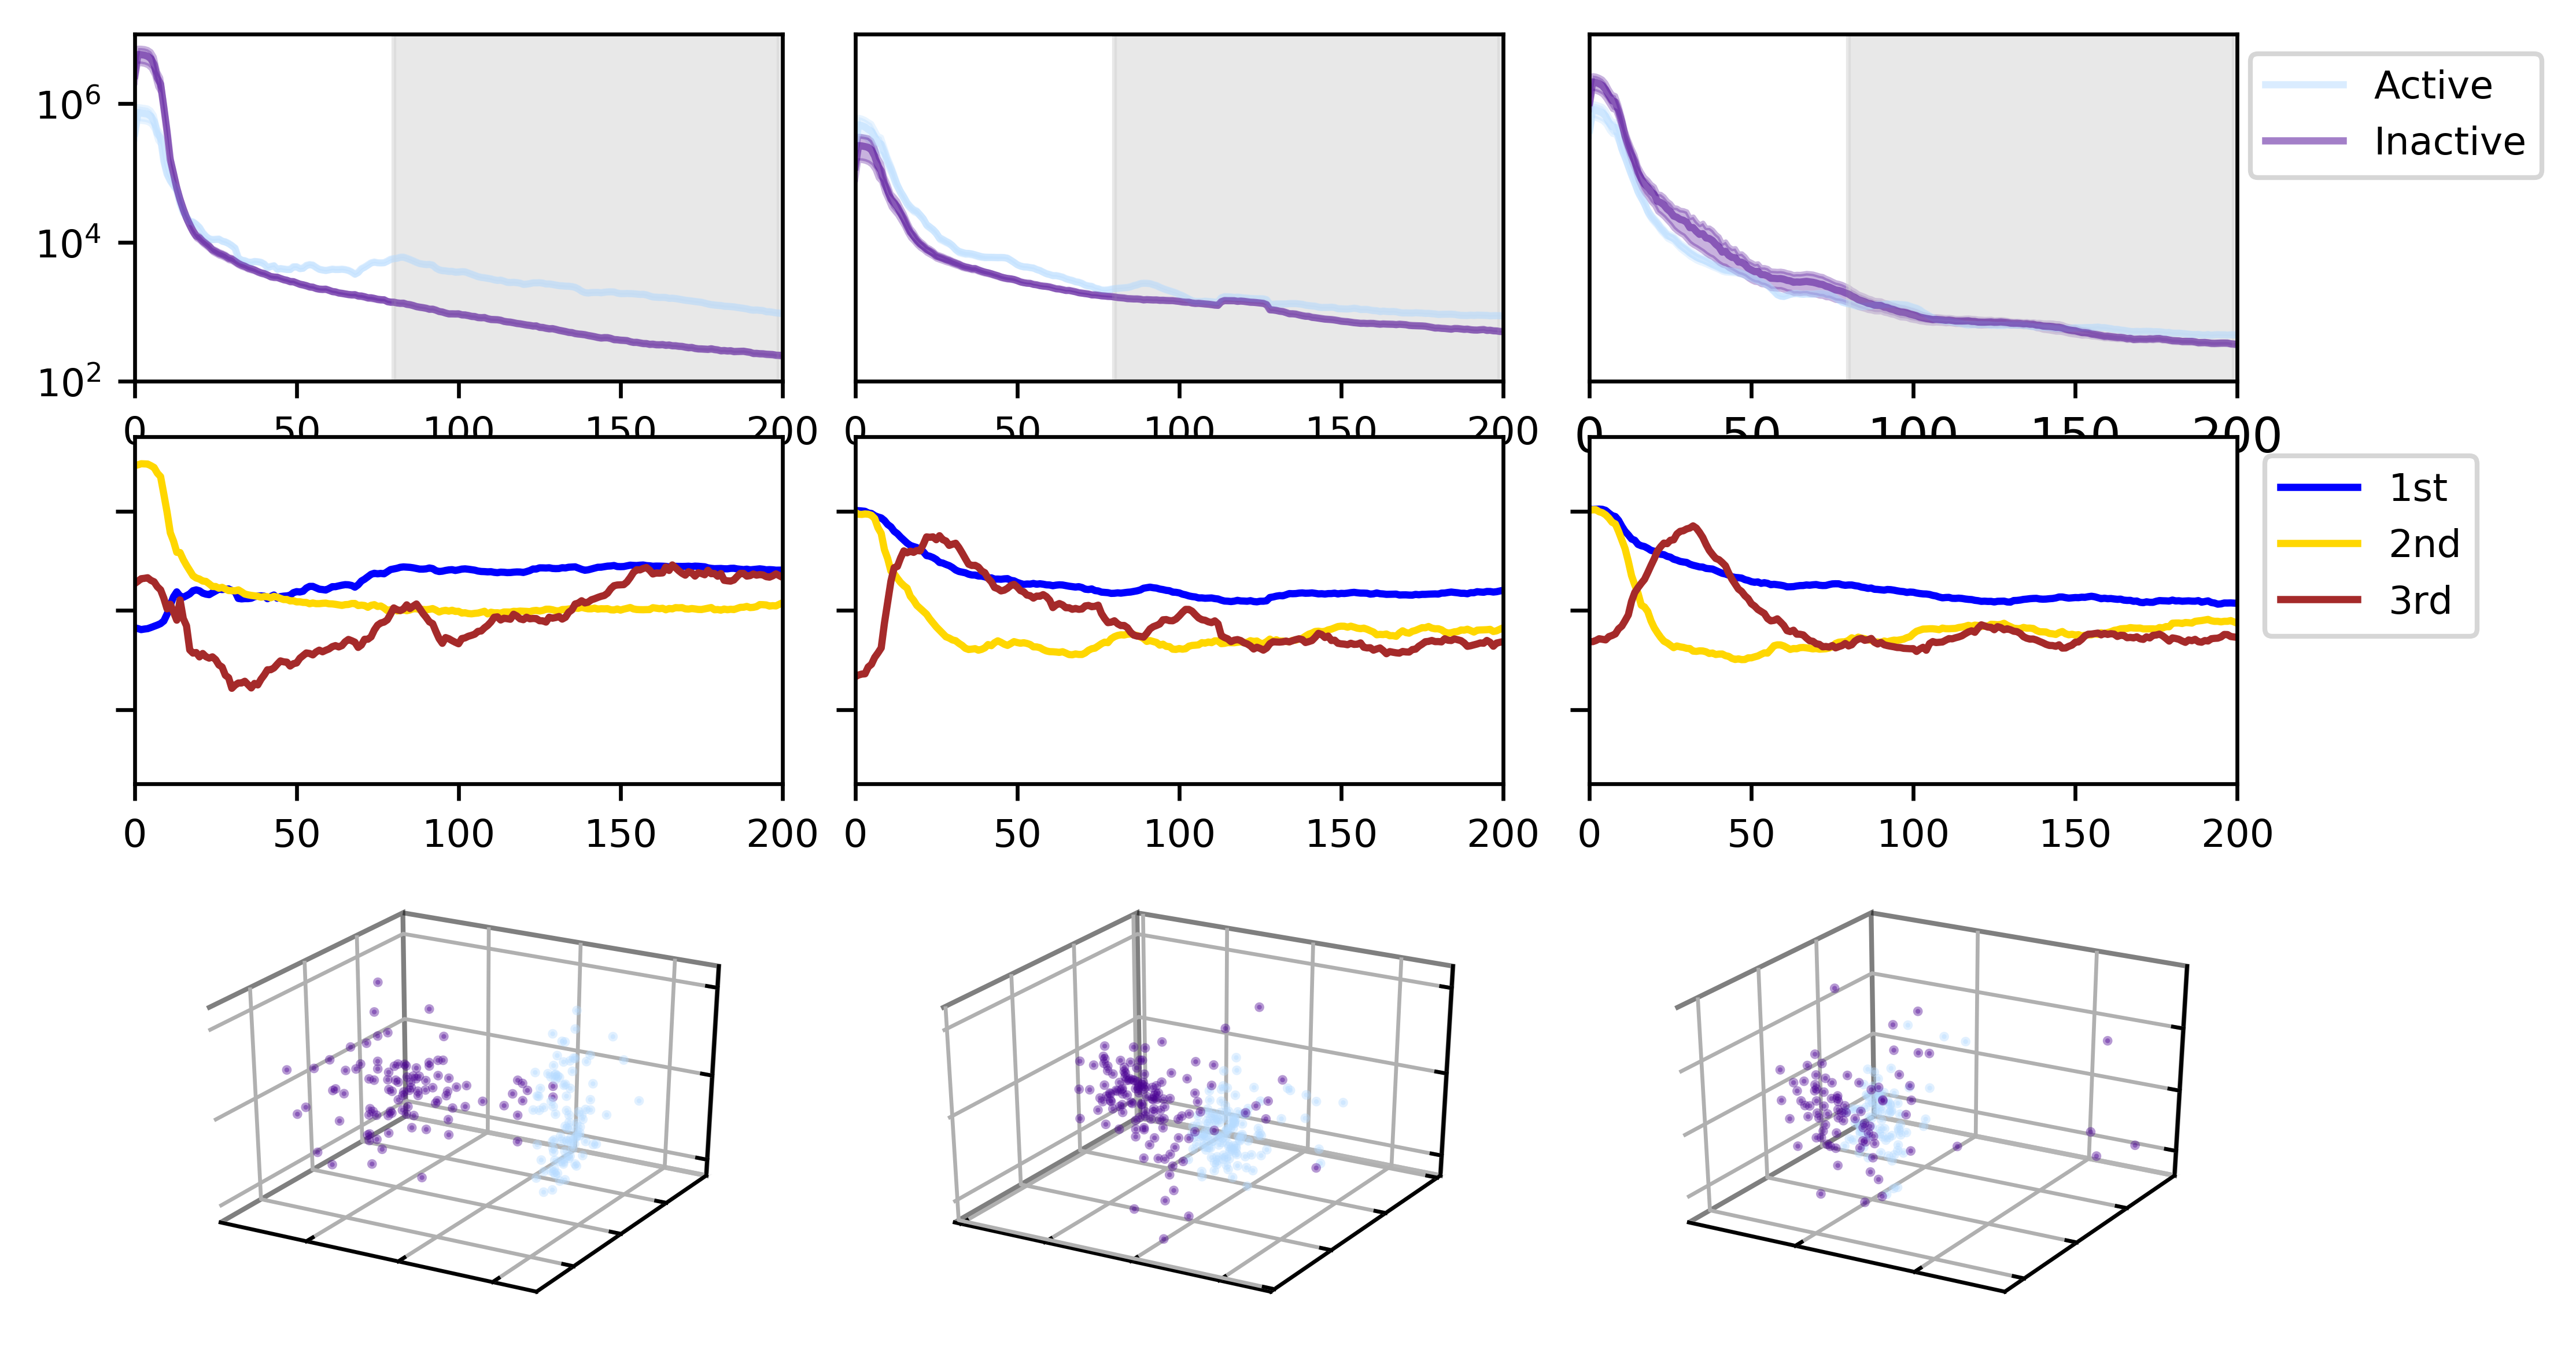

In [79]:
# Final Revision to Keep all things equal and consistent

fig = plt.figure(figsize=(7, 4.5), dpi = 300)
fig.patch.set_facecolor('white')

yticksize = 4


# Make the Subplots
# Color Labels
ax_z007_1 = fig.add_axes([0.05556, 0.63995, 0.26667, 0.2222])

ax_z007_2 = fig.add_axes([0.05556, 0.3822, 0.26667, 0.2222])

ax_z007_3 = fig.add_axes([0.05556, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
ax_z020_1 = fig.add_axes([0.35222, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z020_2 = fig.add_axes([0.35222, 0.3822, 0.26667, 0.2222])

ax_z020_3 = fig.add_axes([0.35779, 0.04, 0.26667, 0.27778], projection='3d')


# Make the Subplots
ax_z017_1 = fig.add_axes([0.65445, 0.63995, 0.26667, 0.2222])
# Pressure Waveform
ax_z017_2 = fig.add_axes([0.65445, 0.3822, 0.26667, 0.2222])
# Spectrogram
ax_z017_3 = fig.add_axes([0.66002, 0.04, 0.26667, 0.27778], projection='3d')


# # Make the Subplots
# # Color Labels
# ax1 = fig.add_axes([0.0333, 0.6723, 0.933, 0.2727], frame_on=False, xticklabels=[], ylim=(0, 1))
# # Pressure Waveform
# ax2 = fig.add_axes([0.0333, 0.4863, 0.933, 0.133], frame_on=False, xticklabels=[], ylim=(-1.2, 1.2))
# # Spectrogram
# ax3 = fig.add_axes([0.0333, 0.1263, 0.933, 0.363], ylim=(-1.2, 1.2))


# Plot the Componenets of z007
## PSD
plot_summary_psd_paper(Pxx_concat=z007_Pxx_concat[:,0,:], 
                       freqs=z007_freqs, 
                       num_trials=int(z007_Pxx_concat.shape[0]/2), ax=ax_z007_1)
ax_z007_1.set_ylim(bottom=100, top = 10e6)
ax_z007_1.tick_params(axis='both', which='major', labelsize=ticksize)
# ax_z007_1.set_xticklabels([])
# ax_z007_1.tick_params(axis='x', which='both',length=0)

# Highlight High Gamma
floor, roof = ax_z007_1.get_ylim()
ax_z007_1.fill_between(x=np.arange(80,200), y1=floor, y2=roof, color = "lightgrey", alpha=.5)



## PSCs
z007_pca = run_local_pca_analysis(Pxx_norm= z007_Pxx_norm, channel= 0)
plot_the_pscs_fp(pca=z007_pca, flip=[0], ax=ax_z007_2)

ax_z007_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z007_2.tick_params(axis='y', which='both',length=yticksize)
# ax[3].axhline(y=0, color = 'black', alpha=.5)
ax_z007_2.set_ylim([-.35, .35])
ax_z007_2.set_xlim([0, 200])
ax_z007_2.set_yticklabels([])

## Plot the 3D Scatter
plot_the_pca_scatter_3d_w_flip(Pxx_norm=z007_Pxx_norm, pca=z007_pca,  
                        channel=0, 
                        Num_Epochs=int(z007_Pxx_norm.shape[0]/2), background=False, flip=[0], ax=ax_z007_3)
ax_z007_3.set_xticklabels([])
ax_z007_3.set_yticklabels([])
ax_z007_3.set_zticklabels([])
ax_z007_3.tick_params(axis='both', which='both',length=yticksize)


# Plot the Componenets of z020
## PSD
plot_summary_psd_paper(Pxx_concat=z020_Pxx_concat[:,z020_chan,:], 
                       freqs=z020_freqs, 
                       num_trials=int(z020_Pxx_concat.shape[0]/2), ax=ax_z020_1)
# ax[1].set_ylim(bottom=100)
ax_z020_1.set_ylim(bottom=100, top = 10e6)
ax_z020_1.set_yticklabels([])
ax_z020_1.tick_params(axis='both', which='major', labelsize=ticksize)

visible_yticks = []
visible_ytickslabels = []
for ind, label in enumerate(ax_z020_1.get_yticklabels()):
    if label in [10^2, 10^4, 10^6]:
#             label.set_visible(True)
        visible_yticks.append(ind)
        visible_ytickslabels.append(label)
#         else:
#             label.set_visible(False)
ax_z020_1.set_yticks(visible_yticks) 


# ax_z020_1.set_xticklabels([])
# ax_z020_1.tick_params(axis='x', which='both',length=0)

# Highlight High Gamma
floor, roof = ax_z020_1.get_ylim()
ax_z020_1.fill_between(x=np.arange(80,200), y1=floor, y2=roof, color = "lightgrey", alpha=.5)



# PSCs
z020_pca = run_local_pca_analysis(Pxx_norm= z020_Pxx_norm, channel= z020_chan)
plot_the_pscs_fp(pca=z020_pca, flip=[1], ax=ax_z020_2)
# ax[3].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax_z020_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z020_2.tick_params(axis='y', which='both',length=yticksize)
# ax[4].axhline(y=0, color = 'black', alpha=.5)
ax_z020_2.set_ylim([-.35, .35])
ax_z020_2.set_yticklabels([])
ax_z020_2.set_xlim([0, 200])

# Scatter
plot_the_pca_scatter_3d_w_flip(Pxx_norm=z020_Pxx_norm, pca=z020_pca,  
                        channel=z020_chan, 
                        Num_Epochs=int(z020_Pxx_norm.shape[0]/2), background=False, flip=None, ax=ax_z020_3)
ax_z020_3.set_xticklabels([])
ax_z020_3.set_yticklabels([])
ax_z020_3.set_zticklabels([])
ax_z020_3.tick_params(axis='both', which='both',length=yticksize)
ax_z020_3.set_xlim(-20,15)
ax_z020_3.set_ylim(-10,20)
ax_z020_3.set_zlim(-6,6)



# z017
## PSD
plot_summary_psd_paper(Pxx_concat=z017_Pxx_concat[:,z017_chan,:], 
                       freqs=z017_freqs, 
                       num_trials=int(z017_Pxx_concat.shape[0]/2), ax=ax_z017_1)
# ax_z017_1.set_ylim(bottom=100)
ax_z017_1.set_ylim(bottom=100, top = 10e6)
visible_yticks = []
visible_ytickslabels = []
for ind, label in enumerate(ax_z017_1.get_yticklabels()):
    if label in [10^2, 10^4, 10^6]:
#             label.set_visible(True)
        visible_yticks.append(ind)
        visible_ytickslabels.append(label)
#         else:
#             label.set_visible(False)
ax_z017_1.set_yticks(visible_yticks) 
ax_z017_1.set_yticklabels([])

# ax_z017_1.set_xticklabels([])
ax_z017_1.legend(loc='best', fontsize=8, bbox_to_anchor=(.5, 0, 1, 1))
# ax_z017_1.tick_params(axis='x', which='both',length=0)

# Highlight High Gamma
floor, roof = ax_z017_1.get_ylim()
ax_z017_1.fill_between(x=np.arange(80,200), y1=floor, y2=roof, color = "lightgrey", alpha=.5)



# PSCs
z017_pca = run_local_pca_analysis(Pxx_norm= z017_Pxx_norm, channel= z017_chan)
plot_the_pscs_fp(pca=z017_pca, flip=[1], ax=ax_z017_2)
# ax_z017_2.plot(z017_pca.components_[0, :], label='1st', color = 'blue')
# ax_z017_2.plot(z017_pca.components_[1, :], label='2nd', color = 'gold')
# ax_z017_2.plot(z017_pca.components_[2, :]*-1, label='3rd', color = 'brown')

# ax[5].set_ylabel(ylabel='element magnitude', fontsize=subsize)
ax_z017_2.tick_params(axis='both', which='major', labelsize=ticksize)
ax_z017_2.tick_params(axis='y', which='both',length=yticksize)
# ax_z017_2.axhline(y=0, color = 'black', alpha=.5)
ax_z017_2.set_ylim([-.35, .35])
ax_z017_2.set_yticklabels([])
ax_z017_2.set_xlim([0, 200])
ax_z017_2.legend(loc='best', fontsize=8, bbox_to_anchor=(.4, 0, 1, 1))




# Plot 3D
plot_the_pca_scatter_3d_w_flip(Pxx_norm=z017_Pxx_norm, pca=z017_pca, 
                        channel=z017_chan, 
                        Num_Epochs=int(z017_Pxx_norm.shape[0]/2), background=False, flip=None, ax=ax_z017_3)
ax_z017_3.set_xticklabels([])
ax_z017_3.set_yticklabels([])
ax_z017_3.set_zticklabels([])
ax_z017_3.tick_params(axis='both', which='both',length=yticksize)

# ax.set(xlabel='component 1', ylabel='component 2', zlabel='component 3')
# ax.axis('equal')


# # Save the Figure
# figure_name = 'PSC_Kai_Summary' + '_Final_cb_tqg_aligned_with_shading.svg'
# figure_type_folder = FIGURES_DIR / 'PSC_Summary'


# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='png')
# fig.savefig(figure_location, dpi=300, papertype=None, format='svg')



plt.show()




